# 📘 ENTREGA FINAL

**Nombre del alumno:** Nancy M. Montenovo

**Datasets:** `ventas.csv`, `clientes.csv`, `marketing.csv` (en Drive).

### Mapeo a la Rúbrica
###Etapa 1: Recopilación y Preparación de Datos
1. Crear un documento en Google Colaboratory y cargar los sets de datos como DataFrames.
2. Introducción a Pandas: realizar un análisis exploratorio inicial de los DataFrames.
3. Calidad de Datos: Identificar valores nulos y duplicados en los conjuntos de datos. Documentar el estado inicial de los datos.
###Etapa 2: Preprocesamiento y Limpieza de Datos
1. Limpieza de Datos: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar el proceso y los resultados.
2. Transformación de Datos: Aplicar filtros y transformaciones para crear una tabla de ventas que muestre solo los productos con alto rendimiento.
3. Agregación: Resumir las ventas por categoría de producto y analizar los ingresos generados.
4. Integración de Datos: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.
###Etapa 3: Análisis de Datos
1. Estadística Descriptiva: Calcular medidas de tendencia central y dispersión sobre las ventas. Presentar los resultados en un informe.
2. Análisis Exploratorio de Datos (EDA): Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.
3. Correlación: Evaluar la relación entre diferentes variables (por ejemplo, precio y cantidad vendida) y mostrar los resultados en un gráfico.
###Etapa 4: Visualización de Datos
1. Visualización con Matplotlib: Crear gráficos básicos (líneas, barras, dispersión)
2. Visualización Avanzada con Seaborn: Desarrollar visualizaciones estadísticas avanzadas, utilizando paletas y estilos para mejorar la presentación.
###Presentación Final: Preparar una presentación que resuma los hallazgos, insights y visualizaciones generadas a lo largo del proyecto.



# 🧩 Etapa 1: Recopilación y Preparación de Datos
**Objetivo:** Demostrar habilidades en Python, familiaridad con el entorno de trabajo y conocimientos básicos sobre manipulación de datos.

##1️⃣ Carga de datos

**Etapa inicial**

*   Cargar los datasets como DataFrames usando pandas.
*   Uso de pd.read_csv() para cargar los archivos CSV.
*   Verificación de la ruta correcta
*   Revisión de las primeras filas con .head().



In [1]:
import pandas as pd
import numpy as np

In [2]:
# Montar la unidad
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Cargar los archivos csv que se encuentren en la carpeta datasets
import os
os.listdir("/content/drive/MyDrive/datasets")

['marketing.csv',
 'clientes.csv',
 'ventas.csv',
 'ventas_clean (1).gsheet',
 'ventas.gsheet',
 'marketing.gsheet',
 'ventas_clean_NM (4).gsheet',
 'marketing_clean_NM (2).gsheet',
 'clientes_clean.csv',
 'marketing_clean.csv',
 'ventas_clean.csv',
 'ventas_clean_NM (3).gsheet',
 'ventas_clean_NM (2).gsheet',
 'ventas_clean.gsheet',
 'clientes_clean_NM.gsheet',
 'ventas_clean_NM (1).gsheet',
 'marketing_clean_NM (1).gsheet',
 'marketing_clean_NM.gsheet',
 'ventas_clean_NM.gsheet',
 'datos_consolidados_ventas_marketing.csv',
 'marketing_clean_NM.csv',
 'ventas_clean_NM.csv',
 'clientes_clean_NM.csv']

In [4]:
# Definimos las rutas relativas de los datasets.
ruta_ventas = "/content/drive/MyDrive/datasets/ventas.csv"
ruta_clientes = "/content/drive/MyDrive/datasets/clientes.csv"
ruta_marketing = "/content/drive/MyDrive/datasets/marketing.csv"

# Cargamos los CSV como DataFrames.
ventas = pd.read_csv(ruta_ventas)
clientes = pd.read_csv(ruta_clientes)
marketing = pd.read_csv(ruta_marketing)

# Validamos formas para comprobar que se cargaron correctamente.
print("ventas.shape ->", ventas.shape)
print("clientes.shape ->", clientes.shape)
print("marketing.shape ->", marketing.shape)

# Mostramos las primeras filas de cada dataset para corroborar estructura de columnas.
display(ventas.head(3))
display(clientes.head(3))
display(marketing.head(3))

ventas.shape -> (3035, 6)
clientes.shape -> (567, 5)
marketing.shape -> (90, 6)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024


##2️⃣ Análisis exploratorio inicial

*   Se utilizan los métodos como .info(), .describe(), .shape y .columns. dtypes para hacer un análisis inicial de los DF.
> Esto permite entender la estructura y el contenido de los datos.
> Se incluyen comentarios sobre los resultados obtenidos inicialmente.


In [5]:
# ================================================================
# f FUNCIÓN PARA HACER ANALISIS EXPLORATORIO DE LOS DIFERENTES DF
# ================================================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de filas y columnas
# 2️⃣ El nombre de las columnas
# 3️⃣ El tipo de dato de cada columna
# 4️⃣ El total de valores nulos por columna
# 5️⃣ Visualización de los primeros 5 registros

def eda(df, nombre):
    print(f"=== {nombre} ===")
    print("Shape: Indica Cant Filas y Columnas:", df.shape) #cant de filas y col
    print("-"*100)
    print("Nombre de columnas del df:", list(df.columns)) #nombre de las columnas
    print("-"*100)
    print("Tipos de datos:") #tipos de datos
    print(df.dtypes)
    print("-"*100)
    print("\nNulos por columna:")
    print(df.isna().sum())  #cant de nulos por columnas
    print("-"*100)
    print("\nPrimeras 5 filas:")
    display(df.head(5)) #visualizar las primeras 5 filas
    print("-"*100)
    print("\nDescribe (numérico):")
    display(df.describe(include='number'))
    print("-"*100)

In [6]:
#se llama a la función "eda" para validar el df "Ventas"
eda(ventas, "VENTAS (inicial)")

=== VENTAS (inicial) ===
Shape: Indica Cant Filas y Columnas: (3035, 6)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_venta', 'producto', 'precio', 'cantidad', 'fecha_venta', 'categoria']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_venta         int64
producto        object
precio          object
cantidad       float64
fecha_venta     object
categoria       object
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_venta       0
producto       0
precio         2
cantidad       2
fecha_venta    0
categoria      0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,$69.94,5.0,02/01/2024,Decoración
1,811,Lámpara de mesa,$105.10,5.0,02/01/2024,Decoración
2,1156,Secadora,$97.96,3.0,02/01/2024,Electrodomésticos
3,1372,Heladera,$114.35,8.0,02/01/2024,Electrodomésticos
4,1546,Secadora,$106.21,4.0,02/01/2024,Electrodomésticos


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_venta,cantidad
count,3035.000000,3033.000000
mean,1499.851400,6.496538
std,866.465379,3.457250
min,1.000000,1.000000
25%,748.500000,3.000000
50%,1502.000000,7.000000
75%,2249.500000,9.000000
max,3000.000000,12.000000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración inicial del df **Ventas**, se puede concluir que:


*   Está compuesto de 3035 filas y 6 columnas
*   Las columnas producto, precio, fecha_venta y categoria son del tipo object y la cantidad tipo float64
*   Hay dos elementos nulos en las columnas precio y cantidad
*   El precio al tener el valor $ no lo está mostrando como valor numérico




In [7]:
#se llama a la función "eda" para validar el df "clientes"
eda(clientes, "CLIENTES (inicial)")

=== CLIENTES (inicial) ===
Shape: Indica Cant Filas y Columnas: (567, 5)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_cliente', 'nombre', 'edad', 'ciudad', 'ingresos']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_cliente    0
nombre        0
edad          0
ciudad        0
ingresos      0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_cliente,edad,ingresos
count,567.000000,567.000000,567.000000
mean,284.000000,37.940035,34668.739012
std,163.823075,10.202885,12974.531446
min,1.000000,20.000000,170.290000
25%,142.500000,30.000000,26015.240000
50%,284.000000,37.000000,35066.830000
75%,425.500000,43.000000,42457.100000
max,567.000000,81.000000,88053.010000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración inicial del df **Clientes**, se puede concluir que:

* Está compuesto de 567 filas y 5 columnas
* Las columnas nombre y ciudad son del tipo object, edad tipo entero e ingresos float64.
* No existen elementos nulos

In [8]:
#se llama a la función "eda" para validar el df "marketing"
eda(marketing, "MARKETING (inicial)")

=== MARKETING (inicial) ===
Shape: Indica Cant Filas y Columnas: (90, 6)
----------------------------------------------------------------------------------------------------
Nombre de columnas del df: ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
----------------------------------------------------------------------------------------------------
Tipos de datos:
id_campanha       int64
producto         object
canal            object
costo           float64
fecha_inicio     object
fecha_fin        object
dtype: object
----------------------------------------------------------------------------------------------------

Nulos por columna:
id_campanha     0
producto        0
canal           0
costo           0
fecha_inicio    0
fecha_fin       0
dtype: int64
----------------------------------------------------------------------------------------------------

Primeras 5 filas:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,20/03/2024,03/05/2024
1,12,Tablet,RRSS,3.40,26/03/2024,13/05/2024
2,32,Lámpara de mesa,Email,5.54,28/03/2024,20/04/2024
3,21,Smartphone,RRSS,6.37,29/03/2024,16/05/2024
4,58,Alfombra,Email,4.25,31/03/2024,05/05/2024


----------------------------------------------------------------------------------------------------

Describe (numérico):


,id_campanha,costo
count,90.000000,90.000000
mean,45.500000,4.928667
std,26.124701,0.947750
min,1.000000,2.950000
25%,23.250000,4.372500
50%,45.500000,4.900000
75%,67.750000,5.562500
max,90.000000,7.390000


----------------------------------------------------------------------------------------------------


####Como resultado de la exploración inicial del df  **Marketing**, se puede concluir que:

* Está compuesto de 90 filas y 6 columnas
* Las columnas producto, canal, fecha_inicio y fecha_fin son del tipo object, y costo tipo float64
* No existen elementos nulos
* Se deberán modificar las fechas a datatime

## 3️⃣ Calidad de los datos

* Identificar valores nulos y duplicados en los conjuntos de datos usando .isna().sum() y .duplicated().sum()

In [9]:
# ============================================
# f FUNCIÓN DE CONTROL DE CALIDAD DE DATOS
# ============================================
# Esta función analiza un DataFrame existente (df) y muestra:
# 1️⃣ La cantidad de valores nulos por columna.
# 2️⃣ El total de filas completamente duplicadas.
# 3️⃣ Si se especifica una columna clave, los valores más repetidos de esa clave.

def calidad(df, nombre, clave=None):
    """
    Analiza la calidad del DataFrame:
      - Muestra cantidad de nulos por columna.
      - Cuenta filas duplicadas completas.
      - Si se indica una clave, muestra los valores duplicados más frecuentes.
    Parámetros:
      df: DataFrame de pandas que se analizará.
      nombre: texto descriptivo del DataFrame (ejemplo: 'VENTAS').
      clave: (opcional) nombre de la columna para buscar duplicados específicos.
    """

    # -------------------------------------------------
    # Mostrar título descriptivo con el nombre del DF
    # -------------------------------------------------
    print(f"### {nombre}")

    # -------------------------------------------------
    # Mostrar cantidad de valores nulos por columna
    # -------------------------------------------------
    # df.isna() devuelve un DataFrame booleano con True donde hay NaN.
    # .sum() cuenta los True (o sea, los nulos) por columna.
    # .to_frame("nulos") convierte el resultado en un DataFrame con una columna llamada 'nulos'.
    display(df.isna().sum().to_frame("nulos"))

    # -------------------------------------------------
    # Contar filas duplicadas completas
    # -------------------------------------------------
    # df.duplicated(keep=False) marca como True todas las filas que tienen otra igual.
    # keep=False significa que marca todas las copias, no solo una.
    # .sum() cuenta cuántas filas están repetidas.
    dup_rows = df.duplicated(keep=False).sum()
    print("Filas duplicadas (exactas):", dup_rows)

    # -------------------------------------------------
    # Si se especificó una columna clave válida, analizar duplicados por esa columna
    # -------------------------------------------------
    # if clave analiza que clave no sea None
    # and (y)
    if clave and clave in df.columns:
    # clave in df.columns-- >que clave sea una columna existente dentro de las columnas del dataframe
    # si no le paso ninguna columna no va a querer encontrar duplicados por columna
    # y si me equivoco y le paso una columna que no existe en el dataframe, tampoco ingresara al if.
        # Contar cuántas filas tienen valores repetidos en esa columna
        dup_key = df[clave].duplicated(keep=False).sum()
        print(f"Duplicados por clave '{clave}':", dup_key)

        # Si existen duplicados, mostrar cuáles son los valores más repetidos
        if dup_key > 0:
            # Filtrar filas donde esa clave esté duplicada
            # df[clave].duplicated(keep=False) devuelve True donde el valor se repite
            duplicados_ordenados = (
                df[df[clave].duplicated(keep=False)][clave]
                .value_counts()                # Cuenta cuántas veces aparece cada valor
                .sort_values(ascending=False)   # Ordena de mayor a menor (más duplicados arriba)
            )

            print("\n🔁 Top valores duplicados más frecuentes:")
            # Mostrar solo los primeros 10 (los más repetidos)
            display(duplicados_ordenados.head(10))
        else:
            print(f"No se encontraron duplicados en la clave '{clave}'.")
    else:
        # Si la clave no fue pasada o no existe en el DataFrame
        if clave:
            print(f"La clave '{clave}' no existe en el DataFrame.")
        else:
            print("No se indicó una clave para analizar duplicados por columna.")
#fin de def calidad

In [10]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Ventas**
calidad(ventas, "VENTAS", clave="id_venta")

### VENTAS


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 70
Duplicados por clave 'id_venta': 70

🔁 Top valores duplicados más frecuentes:


,count
id_venta,
56,2
421,2
424,2
1868,2
2545,2
2778,2
145,2
300,2
439,2


####Como resultado de la ejecución que analiza nulos y duplicados, se puede observar que en el df  **Ventas**:

* Existen 2 nulos en las columnas precio y cantidad
* Existen 70 filas duplicadas
* Al buscar por **clave** id_venta también devuelve 70 registros duplicados
* 2 es la cantidad de veces que mayor se repite un registro

**Requiere llevar a cabo limpieza de datos**

In [11]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Clientes**
calidad(clientes, "CLIENTES", clave="id_cliente")

### CLIENTES


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.


####Como resultado de la ejecución que analiza nulos y duplicados, se puede observar que en el df  **Clientes**:

* No existen nulos en el df
* No existen filas duplicadas
* No existen filas duplicadas por clave id_cliente

**No se debe llevar a cabo limpieza de datos**

In [12]:
# se llama a la función "calidad" para analizar nulos, duplicados en el df **Marketing**
calidad(marketing, "MARKETING", clave="id_campanha")

### MARKETING


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.


####Como resultado de la ejecución que analiza nulos y duplicados, se puede observar que en el df  **Marketing**:

* No existen nulos
* No existen filas duplicadas
* No existen filas duplicadas al buscar por clave id_campanha

**No se debe llevar a cabo limpieza de datos**

# 🧹 Etapa 2: Preprocesamiento y Limpieza de Datos
**Objetivo:** Demostrar conocimiento de las técnicas de limpieza y transformación de datos.

## 1️⃣ Limpieza de datos

*Objetivo: Limpiar el conjunto de datos eliminando duplicados y caracteres no deseados. Documentar del proceso y los resultados.*

In [90]:
# ============================================
# f LIMPIEZA Y NORMALIZACIÓN DE LOS DATASETS
# ============================================
# Creación de una función para hacer limpieza y normalización de los DataFrames:
#   ventas, clientes, marketing
# Pasos:
# Eliminar duplicados.
# Normalizar **texto** en columnas `object` (trim + capitalización simple).
# Convertir fechas a fechas reales
# Convertir `precio` y `cantidad` a numéricos si existen.
# Guardar CSV limpios.
# ============================================
# -------------------------------------------------
# 1️⃣ Crear copias independientes para no modificar los df originales
# -------------------------------------------------
ventas_clean = ventas.copy() #el nuevo df se guarda en ventas_clean
clientes_clean = clientes.copy() #el nuevo df se guarda en clientes_clean
marketing_clean = marketing.copy() #el nuevo df se guarda en marketing_clean

# -------------------------------------------------
# 2️⃣ Eliminar filas completamente duplicadas
# -------------------------------------------------
ventas_clean = ventas_clean.drop_duplicates()
clientes_clean = clientes_clean.drop_duplicates()
marketing_clean = marketing_clean.drop_duplicates()

In [91]:
#se llama a la función "calidad" para análisis de ventas_clean
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")
print ("shape:",ventas_clean.shape)

### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,2
cantidad,2
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.
shape: (3000, 6)


In [92]:
#Identificar los registros con valores nulos
# 1. Crear una copia del DataFrame  'ventas_clean'
temp_ventas_for_null_check = ventas_clean.copy()

# 2. Aplicar la eliminación de duplicados como en el proceso de limpieza
temp_ventas_for_null_check = temp_ventas_for_null_check.drop_duplicates()

# 3. Convertir 'precio' a numérico con 'errors="coerce"' para que los valores no numéricos se conviertan en NaN
# Esto imita el pre-procesamiento que ocurre antes de llamar a rellenar_valores_vacios
temp_ventas_for_null_check['precio'] = pd.to_numeric(
    temp_ventas_for_null_check['precio'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip(),
    errors='coerce'
)

# 4. Identificar los id_venta de las filas donde 'precio' o 'cantidad' son NaN
ids_con_nulos_antes_de_rellenar = temp_ventas_for_null_check[
    temp_ventas_for_null_check['precio'].isna() | temp_ventas_for_null_check['cantidad'].isna()
]['id_venta']

print("id_venta de los registros con NULOS en 'precio' o 'cantidad' (antes de rellenar con promedios):\n")
display(ids_con_nulos_antes_de_rellenar)


id_venta de los registros con NULOS en 'precio' o 'cantidad' (antes de rellenar con promedios):



,id_venta
136,627
139,2171


In [93]:
# f Para rellenar valores vacíos con el promedio por producto
def rellenar_valores_vacios(df):
    # Calcular el promedio de precio y cantidad por producto
    promedios = df.groupby('producto')[['precio', 'cantidad']].mean().reset_index()
    print("--- DataFrame 'promedios' (promedio por producto) ---")
    display(promedios)

    # Unir los promedios con el DataFrame original
    df = df.merge(promedios, on='producto', suffixes=('', '_promedio'), how='left')

    # Rellenar los valores vacíos
    df['precio'] = df['precio'].fillna(df['precio_promedio'])
    df['cantidad'] = df['cantidad'].fillna(df['cantidad_promedio'])

    # Eliminar las columnas de promedios
    df.drop(columns=['precio_promedio', 'cantidad_promedio'], inplace=True)

    return df

In [94]:
# Aplicar la función para rellenar los valores vacíos en ventas_clean

if "precio" in ventas_clean.columns:
    ventas_clean["precio"] = (
        ventas_clean["precio"]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
    )
    ventas_clean["precio"] = pd.to_numeric(ventas_clean["precio"], errors="coerce")


# Ahora aplica la función a los valores vacíos en ventas_clean
ventas_clean = rellenar_valores_vacios(ventas_clean)

--- DataFrame 'promedios' (promedio por producto) ---


,producto,precio,cantidad
0,Adorno de pared,76.097800,6.330000
1,Alfombra,74.098300,6.150000
2,Aspiradora,77.447400,6.510000
3,Auriculares,76.302727,6.699301
4,Batidora,77.537200,6.720000
5,Cafetera,79.046581,6.538462
6,Candelabro,74.595417,6.666667
7,Consola de videojuegos,76.346869,6.292929
8,Cortinas,73.649900,6.100000
9,Cuadro decorativo,74.578000,7.260000


In [95]:
calidad(ventas_clean, "VENTAS CLEAN", clave="id_venta")
print("-"*100)
print("Se muestran los id_venta luego de aplicar la función de rellenar")
display(ventas_clean[(ventas_clean['id_venta'] == 627) | (ventas_clean['id_venta'] == 2171)])
print("-"*100)
print ("shape:",ventas_clean.shape)
print ("shape:",ventas_clean.dtypes)


### VENTAS CLEAN


,nulos
id_venta,0
producto,0
precio,0
cantidad,0
fecha_venta,0
categoria,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_venta': 0
No se encontraron duplicados en la clave 'id_venta'.
----------------------------------------------------------------------------------------------------
Se muestran los id_venta luego de aplicar la función de rellenar


,id_venta,producto,precio,cantidad,fecha_venta,categoria
136,627,Elementos de cerámica,71.611515,6.424242,17/01/2024,Decoración
139,2171,Parlantes Bluetooth,73.583571,6.734694,17/01/2024,Electrónica


----------------------------------------------------------------------------------------------------
shape: (3000, 6)
shape: id_venta         int64
producto        object
precio         float64
cantidad       float64
fecha_venta     object
categoria       object
dtype: object


####Como resultado de la limpieza del df  **ventas_clean**, se puede concluir que:

* Se removieron 35 filas duplicadas
* No existen filas duplicadas al buscar por clave id_venta
* Se realiza la transformación de los valores de la columna precio, para poder rellenarlos.
* Los elementos nulos fueron reeplazados por el promedio y ya no existen valores nulos en el DF
* El nuevo df ventas_clean contiene 3000 filas y 6 columnas


In [96]:
#se llama a la función "calidad" para hacer análisis de clientes_clean
calidad(clientes_clean, "CLIENTES CLEAN", clave="id_cliente")
print ("shape:",clientes_clean.shape)

### CLIENTES CLEAN


,nulos
id_cliente,0
nombre,0
edad,0
ciudad,0
ingresos,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_cliente': 0
No se encontraron duplicados en la clave 'id_cliente'.
shape: (567, 5)


####Como resultado de la limpieza del df clientes_clean, se puede concluir que:

* El df clientes_clean no sufre cambios, ya que no contenía duplicados, ni valores nulos.

In [97]:
#se llama a la función "calidad" para hacer análisis de marketing_clean
calidad(marketing_clean, "MARKETING CLEAN", clave="id_campanha")
print ("shape:",marketing_clean.shape)

### MARKETING CLEAN


,nulos
id_campanha,0
producto,0
canal,0
costo,0
fecha_inicio,0
fecha_fin,0


Filas duplicadas (exactas): 0
Duplicados por clave 'id_campanha': 0
No se encontraron duplicados en la clave 'id_campanha'.
shape: (90, 6)


####Como resultado de la limpieza del df marketing_clean, se puede concluir que:

* El df marketing_clean no sufre cambios, ya que no contenía duplicados.

In [98]:
# -------------------------------------------------
# 3️⃣f Función para limpiar texto en columnas tipo string
# -------------------------------------------------
def normalizar_texto(df):
    for col in df.select_dtypes(include="object").columns:
        # Se agrupan las operaciones entre paréntesis () para escribirlas en varias líneas
        # Python evalúa todo el bloque como una única expresión.
        df[col] = (
            df[col]
            .astype(str)                              # Convierte cualquier tipo a string
            # .astype(str)  → convierte todo a texto; no tiene parámetros adicionales.
            .str.strip()                               # Elimina espacios al inicio y final
            # .str.strip() no necesita argumentos; borra espacios en blanco por defecto.
            .str.replace(r"[\u200b\t\r\n]", "", regex=True)
            # .str.replace(patron, reemplazo, regex=True)
            #   patron: expresión regular que busca caracteres invisibles (\u200b, tabulaciones, saltos)
            #   reemplazo: ""  → los elimina
            #   regex=True indica que 'patron' es una expresión regular.
            .str.replace(" +", " ", regex=True)
            # reemplaza "uno o más espacios consecutivos" por un solo espacio
            .str.upper()       # Convierte a mayusculas: "juan pérez" → "JUAN  PÉREZ"
        )
        #df_transformado=df[col].astype(str)
        #df_transformado=df_transformado.str.strip()
        #df_transformado=df_transformado.str.replace(r"[\u200b\t\r\n]", "", regex=True)
        #df_transformado=df_transformado.str.replace(" +", " ", regex=True)
        #df_transformado=df_transformado.str.title()
        #df[col]=df_transformado

        #df[col] = df[col].astype(str).str.strip().str.replace(r"[\u200b\t\r\n]", "", regex=True).str.replace(" +", " ", regex=True).str.title()
    return df

In [99]:
## -------------------------------------------------
# 4️⃣ f Función para Normalizar Fechas
# -------------------------------------------------
#Esta función toma un DataFrame como entrada y busca columnas que contengan la palabra "fecha" en su nombre
# (ignorando mayúsculas y minúsculas). Para cada columna encontrada, intenta convertirla al formato `datetime` de pandas,
#manejando errores (`errors="coerce"`) y asumiendo que el día precede al mes (`dayfirst=True`).


def normalizar_fechas(df):
    """
    Normaliza las columnas de fecha en un DataFrame.

    Convierte cualquier columna cuyo nombre contenga 'fecha' a tipo datetime,
    maneja errores de conversión y asume el formato 'DD/MM/YYYY'.

    Args:
        df (pd.DataFrame): El DataFrame a procesar.

    Returns:
        pd.DataFrame: El DataFrame con las columnas de fecha normalizadas.
    """
    for col in df.columns:
        if "fecha" in col.lower():  # detecta columnas con la palabra "fecha"
            df[col] = pd.to_datetime(df[col], errors="coerce", dayfirst=True)
            print(f"Columna '{col}' normalizada a datetime.")
    return df


###Aplicar la función normalizar_fechas a los DataFrames

In [100]:
### normalizar fecha en ventas_clean
print("Normalizando fechas para ventas_clean...")
ventas_clean = normalizar_fechas(ventas_clean)
print("Tipos de datos de ventas_clean después de normalizar:")
display(ventas_clean.dtypes)
display(ventas_clean.head())


Normalizando fechas para ventas_clean...
Columna 'fecha_venta' normalizada a datetime.
Tipos de datos de ventas_clean después de normalizar:


,0
id_venta,int64
producto,object
precio,float64
cantidad,float64
fecha_venta,datetime64[ns]
categoria,object


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos


####Como resultado de la normalización del df ventas_clean, se puede concluir que:

* El campo fecha_venta se visualiza como un campo fecha, y no de tipo objeto

In [101]:
### normalizar fecha en clientes_clean
#no existe ningún campo fecha, se deja a modo ilustrativo
print("\nNormalizando fechas para clientes_clean...")
clientes_clean = normalizar_fechas(clientes_clean)
print("Tipos de datos de clientes_clean después de normalizar:")
display(clientes_clean.dtypes)
display(clientes_clean.head())


Normalizando fechas para clientes_clean...
Tipos de datos de clientes_clean después de normalizar:


,0
id_cliente,int64
nombre,object
edad,int64
ciudad,object
ingresos,float64


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


####Como resultado de la normalización de fechas del df clientes_clean, se puede concluir que:

* No sufre cambios, ya que no existe ningún campo fecha

In [102]:
### normalizar fecha en marketing_clean
print("\nNormalizando fechas para marketing_clean...")
marketing_clean = normalizar_fechas(marketing_clean)
print("Tipos de datos de marketing_clean después de normalizar:")
display(marketing_clean.dtypes)
display(marketing_clean.head())


Normalizando fechas para marketing_clean...
Columna 'fecha_inicio' normalizada a datetime.
Columna 'fecha_fin' normalizada a datetime.
Tipos de datos de marketing_clean después de normalizar:


,0
id_campanha,int64
producto,object
canal,object
costo,float64
fecha_inicio,datetime64[ns]
fecha_fin,datetime64[ns]


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


####Como resultado de la normalización de fechas del df marketing_clean, se puede concluir que:

* Se visualizan como campos fechas, las columnas fecha inicio y fecha fin, que anteriormente estaban como tipo objeto.

###Aplicar la función normalizar_texto a los DataFrames

In [103]:
# -------------------------------------------------
# Aplicar la normalización de texto a "Ventas Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
print('Ventas Clean antes de la normalización')
display(ventas_clean.head(5))
ventas_clean = normalizar_texto(ventas_clean)
print('Ventas Clean luego de la normalización')
display(ventas_clean.head(5))
print()
print(ventas_clean.dtypes)


Ventas Clean antes de la normalización


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,Cuadro decorativo,69.94,5.0,2024-01-02,Decoración
1,811,Lámpara de mesa,105.10,5.0,2024-01-02,Decoración
2,1156,Secadora,97.96,3.0,2024-01-02,Electrodomésticos
3,1372,Heladera,114.35,8.0,2024-01-02,Electrodomésticos
4,1546,Secadora,106.21,4.0,2024-01-02,Electrodomésticos


Ventas Clean luego de la normalización


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5.0,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5.0,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3.0,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8.0,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4.0,2024-01-02,ELECTRODOMÉSTICOS



id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Como resultado de la normalización del df ventas_clean, se puede concluir que:

* Los valores de las columnas Producto y Categoria  se transforman a mayúsculas

In [104]:
# -------------------------------------------------
#  Aplicar la normalización de texto para "Clientes Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
print('Clientes Clean antes de la normalización')
display(clientes_clean.head(5))
clientes_clean = normalizar_texto(clientes_clean)
print('Clientes Clean luego de la normalización')
display(clientes_clean.head(5))
print()
print(clientes_clean.dtypes)

Clientes Clean antes de la normalización


,id_cliente,nombre,edad,ciudad,ingresos
0,1,Aloysia Screase,44,Mar del Plata,42294.68
1,2,Kristina Scaplehorn,25,Posadas,24735.04
2,3,Filip Castagne,50,Resistencia,35744.85
3,4,Liuka Luard,39,Bahía Blanca,27647.96
4,5,Dore Cockshtt,28,Rosario,28245.65


Clientes Clean luego de la normalización


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65



id_cliente      int64
nombre         object
edad            int64
ciudad         object
ingresos      float64
dtype: object


Como resultado de la normalización del df clientes_clean, se puede concluir que:

* Los valores de las columnas nombre y ciudad  se transforman a mayúsculas

In [105]:
# -------------------------------------------------
#  Aplicar la normalización de texto a "Marketing Clean" llamando a la fucnión  "normalizar_texto"
# -------------------------------------------------
print('Marketing Clean antes de la normalización')
display(marketing_clean.head(5))
marketing_clean = normalizar_texto(marketing_clean)
print('Marketing Clean luego de la normalización')
display(marketing_clean.head(5))
print()
print(marketing_clean.dtypes)

Marketing Clean antes de la normalización


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,Adorno de pared,TV,4.81,2024-03-20,2024-05-03
1,12,Tablet,RRSS,3.40,2024-03-26,2024-05-13
2,32,Lámpara de mesa,Email,5.54,2024-03-28,2024-04-20
3,21,Smartphone,RRSS,6.37,2024-03-29,2024-05-16
4,58,Alfombra,Email,4.25,2024-03-31,2024-05-05


Marketing Clean luego de la normalización


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05



id_campanha              int64
producto                object
canal                   object
costo                  float64
fecha_inicio    datetime64[ns]
fecha_fin       datetime64[ns]
dtype: object


Como resultado de la normalización del df marketing_clean, se puede concluir que:

* Los valores de las columnas Producto y canal  se transforman a mayúsculas

In [106]:
# -------------------------------------------------
# 5️⃣ Normalizar valores numéricos en el df "Ventas Clean"
# -------------------------------------------------
# 🏷️ Campo "precio"
# este proceso se ha realizado anteriormente para completar los valores vacíos en precio y cantidad
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5.0,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5.0,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3.0,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8.0,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4.0,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad              float64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


Observación: La transformación del campo **Precio a float**, anteriormente era tipo: object. Se le quita el símbolo peso. Este proceso fue llevado a cabo, ante de hacer el rellenados de los valores nulos.

In [107]:
# 6️⃣Transformación del Campo "cantidad" a Int
if "cantidad" in ventas_clean.columns:
    ventas_clean["cantidad"] = (
        pd.to_numeric(ventas_clean["cantidad"], errors="coerce")
        .round(0) # Round to the nearest whole number
        .astype("Int64")
    )
    # .astype("Int64") usa el tipo entero de pandas que permite valores nulos (NaN)
display(ventas_clean.head(5))
print()
print("Types Ventas Clean")
print(ventas_clean.dtypes)

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS



Types Ventas Clean
id_venta                int64
producto               object
precio                float64
cantidad                Int64
fecha_venta    datetime64[ns]
categoria              object
dtype: object


**Resultado**:

* Se visualiza la transformación de la columna **cantidad a Int**, antes era float
* No se llevan a cabo transformaciones sobre clientes_clean y marketing_clean porque los campos numéricos están correctos (edad tipo Int, ingresos y costo tipo float64)

In [108]:
# -------------------------------------------------
# 7️⃣ Guardar los DataFrames limpios como CSV
# -------------------------------------------------
print('----- Ventas Clean -----')
display(ventas_clean.head())
print('----- Info  -----')
ventas_clean.info()
print(ventas_clean.select_dtypes(include="object").columns)
ventas_clean.to_csv("/content/drive/MyDrive/datasets/ventas_clean_NM.csv", index=False, float_format='%.2f') #Formato float con 2 decimales
print()
print('--------Clientes Clean --------')
display(clientes_clean.head())
print('----- Info  -----')
clientes_clean.info()
print(clientes_clean.select_dtypes(include="object").columns)
clientes_clean.to_csv("/content/drive/MyDrive/datasets/clientes_clean_NM.csv", index=False)
print()
print('------Marketing Clean --------')
display(marketing_clean.head())
print('----- Info  -----')
marketing_clean.info()
print(marketing_clean.select_dtypes(include="object").columns)
marketing_clean.to_csv("/content/drive/MyDrive/datasets/marketing_clean_NM.csv", index=False)
print()
print("✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv")

----- Ventas Clean -----


,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venta     3000 non-null   int64         
 1   producto     3000 non-null   object        
 2   precio       3000 non-null   float64       
 3   cantidad     3000 non-null   Int64         
 4   fecha_venta  3000 non-null   datetime64[ns]
 5   categoria    3000 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 143.7+ KB
Index(['producto', 'categoria'], dtype='object')

--------Clientes Clean --------


,id_cliente,nombre,edad,ciudad,ingresos
0,1,ALOYSIA SCREASE,44,MAR DEL PLATA,42294.68
1,2,KRISTINA SCAPLEHORN,25,POSADAS,24735.04
2,3,FILIP CASTAGNE,50,RESISTENCIA,35744.85
3,4,LIUKA LUARD,39,BAHÍA BLANCA,27647.96
4,5,DORE COCKSHTT,28,ROSARIO,28245.65


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  567 non-null    int64  
 1   nombre      567 non-null    object 
 2   edad        567 non-null    int64  
 3   ciudad      567 non-null    object 
 4   ingresos    567 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 22.3+ KB
Index(['nombre', 'ciudad'], dtype='object')

------Marketing Clean --------


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05


----- Info  -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id_campanha   90 non-null     int64         
 1   producto      90 non-null     object        
 2   canal         90 non-null     object        
 3   costo         90 non-null     float64       
 4   fecha_inicio  90 non-null     datetime64[ns]
 5   fecha_fin     90 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 4.3+ KB
Index(['producto', 'canal'], dtype='object')

✅ Archivos guardados: ventas_clean_NM.csv, clientes_clean_NM.csv, marketing_clean_NM.csv


###Reporte Global luego de la limpieza de datos

In [109]:
# ============================================
# 📊 f REPORTE GLOBAL DE CALIDAD DE DATOS
# ============================================
# Esta función lee los tres DataFrames limpios (o los recibe en memoria)
# y muestra un resumen comparativo de nulos, duplicados y tipos de datos.
# ============================================

def reporte_calidad_global(dfs, nombres):
    """
    Crea un resumen de calidad de varios DataFrames.

    Parámetros:
      dfs: lista de DataFrames (por ejemplo [ventas_clean, clientes_clean, marketing_clean])
      nombres: lista de nombres correspondientes (["VENTAS", "CLIENTES", "MARKETING"])
    """
    resumen = []
    #zip-->es una función incorporada de Python que une elementos de dos (o más) iterables
    # —por ejemplo, listas, tuplas o cualquier objeto iterable— en pares ordenados.
    for df, nombre in zip(dfs, nombres):
        nulos = df.isna().sum().sum()                    # Total de valores nulos, no por columnas sino total, por eso el doble sum
        duplicados = df.duplicated(keep=False).sum()     # Total de filas duplicadas
        columnas = len(df.columns)                       # Cantidad de columnas
        filas = len(df)                                  # Cantidad de registros

        resumen.append({
            "Dataset": nombre,
            "Filas": filas,
            "Columnas": columnas,
            "Nulos totales": nulos,
            "Duplicados": duplicados,
        })

    reporte = pd.DataFrame(resumen)
    #display(reporte)
    return reporte



In [110]:
#ejecución de la función de reporte
display('REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos')
display(reporte_calidad_global([ventas, clientes, marketing], ["VENTAS Original", "CLIENTES Original", "MARKETING Original"]))
display(reporte_calidad_global([ventas_clean, clientes_clean, marketing_clean],["VENTAS Copia   ", "CLIENTES Copia   ", "MARKETING Copia   "]))

'REPORTE GLOBAL, situación de los DF antes y después de la limpieza y transformación de datos'

,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Original,3035,6,4,70
1,CLIENTES Original,567,5,0,0
2,MARKETING Original,90,6,0,0


,Dataset,Filas,Columnas,Nulos totales,Duplicados
0,VENTAS Copia,3000,6,0,0
1,CLIENTES Copia,567,5,0,0
2,MARKETING Copia,90,6,0,0


###Como resultado de la aplicación de limpieza y normalización de datos:

* Se eliminan los duplicados y nulos en el DF Ventas. Los DF de Clientes y Marketing no presentaban duplicados ni valores nulos.
* Se visualiza la transformación de las columnas precio y cantidad, del DF Ventas.
* Se realizaron transformaciones en las fechas, fecha_venta, fecha_inicio y fecha_fin
* Se realizaron trasnformaciones sobre los campos strings, quitando espacios y colocando todo el texto en mayúscula.

## 2️⃣ Transformación de datos
*Objetivo: construir una tabla de rendimiento por producto y quedarnos sólo con los productos de alto rendimiento.*


In [111]:
# ============================================
# TRANSFORMACIÓN: productos de alto rendimiento
# ============================================
# Objetivo:
# - Detectar los productos con mejor desempeño económico (top 20% por ingreso total).
# - Aplicar transformación: calcular ingreso, agregar por producto y filtrar.
# ============================================
#Definición de la función
def encontrar_columna(df, candidatos):
    """
    Busca la primera columna cuyo nombre contenga alguno de los patrones dados.
    - df: DataFrame de pandas.
    - candidatos: lista de patrones (minúsculas).
    """
    # Recorremos todas las columnas del DataFrame
    for c in df.columns:

        # Convertimos el nombre de la columna a minúsculas
        # Esto se hace para comparar sin importar si está escrito con mayúsculas o minúsculas
        nombre = c.lower()

        # Verificamos si alguna palabra (patrón) de la lista 'candidatos'
        # está contenida dentro del nombre de la columna
        # 'any()' devuelve True apenas encuentra una coincidencia
        if any(p in nombre for p in candidatos):
            # Si encontramos una coincidencia, devolvemos el nombre original de la columna
            return c

    # Si termina el bucle y no se encontró ninguna coincidencia, devolvemos None
    return None


In [112]:
# 1️⃣ Detectar la columna producto en el df "ventas_clean"
prod_col = encontrar_columna(ventas_clean, ["producto", "id_producto", "sku", "articulo", "artículo", "prod"])
if prod_col is None:
    raise ValueError("No se encontró columna de producto. Renombrá una columna a 'producto' o similar.")

print("El nombre de la columna es:",prod_col)

El nombre de la columna es: producto


In [113]:
# 2️⃣ Calcular ingreso por registro = precio * cantidad
ventas_perf = (
    ventas_clean
    .assign( #crea nueva columna
        ingreso = ventas_clean["precio"] * ventas_clean["cantidad"]
        # assign(**nuevas_col): crea nuevas columnas y devuelve una copia del DF.
    )
)
#Visualizar la nueva columna "ingreso" y el cálculo obtenido de las primeras filas
display(ventas_perf.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [114]:
# 3️⃣ Agregar métricas por producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=[prod_col],    # Ahora agrupamos por producto Y categoría
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compact”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    # Ordenar resultado por ingreso_total Descending y rendondear el ingreso_total y precio_promedio a 2 decimales
    .sort_values(by='ingreso_total', ascending=False)
    .round({'ingreso_total': 2, 'precio_promedio': 2})
)
#Visualizar el resultado
display(resumen_prod)

,producto,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,82276.38,1112,72.72,176
3,AURICULARES,74175.58,958,76.30,143
20,MICROONDAS,72562.89,912,79.18,135
5,CAFETERA,59607.31,765,79.05,117
9,CUADRO DECORATIVO,54297.6,726,74.58,100
26,SMARTPHONE,54132.44,665,81.40,101
25,SECADORA,52115.45,696,73.34,100
16,JARRÓN DECORATIVO,51130.88,672,74.53,100
4,BATIDORA,50979.2,672,77.54,100
24,RINCÓN DE PLANTAS,50456.45,691,74.82,101


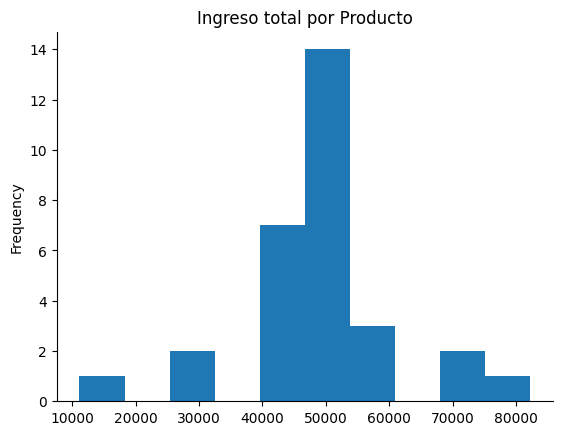

In [115]:
#Generación de un histograma con el ingreso total
from matplotlib import pyplot as plt
resumen_prod['ingreso_total'].plot(kind='hist',  title='Ingreso total por Producto')
plt.gca().spines[['top', 'right',]].set_visible(False)

###**Resumen:**
#### El producto con mayor ingreso total es "LAMPARA DE MESA" con 82.276,38, en segundo lugar están los "AURICULARES" por 74.175,58 y el tercer lugar lo ocupa "MICROONDAS" con $72.562,89
#### El producto menos vendido es el "CANDELABRO" con 11.128,80
#### Se observa que la mayor concentración de ingresos por producto ronda los 50.000 como se puede observar en el gráfico

In [116]:
# 4️⃣ Calcular percentil 80 de ingreso_total con la función quantile()
# --------------------------------------------------------
# Identificar el 80-20

p80_ingreso = resumen_prod["ingreso_total"].quantile(
    q=0.80,                # q indica el percentil deseado (0.80 = 80% de los datos por debajo)
    interpolation="linear" # si el percentil no coincide exactamente con un valor real del dataset,
                           # 'linear' interpola entre los dos valores vecinos.
                           # Ejemplo: si el 80% cae entre 4000 y 5000,
                           # calcula un valor proporcional, por ejemplo 4200.
                           # Otros métodos posibles:
                           #  - 'lower': toma el menor de los dos valores (4000)
                           #  - 'higher': toma el mayor (5000)
                           #  - 'nearest': el más cercano al percentil
                           #  - 'midpoint': el punto medio exacto (4500)
)

# En resumen:
# - quantile calcula el valor límite de un percentil.
# - q define qué percentil queremos.
# - interpolation define cómo se calcula cuando el valor no está exactamente en los datos.
# El resultado (p80_ingreso) es el ingreso total que marca el límite superior del 80% de los productos.

#se muestra el percentil
print(f"El valor del percentil es: {p80_ingreso:.2f}")

El valor del percentil es: 52518.85


In [117]:
# 5️⃣ Filtrar los productos "de alto rendimiento" y ordenarlos
# -------------------------------------------------------------------
# Contexto: `resumen_prod` es un DataFrame con métricas por producto,
# y `p80_ingreso` es el percentil 80 de la columna "ingreso_total".
# Objetivo: quedarnos con los productos cuyo ingreso_total está en el 20% superior (representa el mayor ingreso)
# (ingreso_total >= p80_ingreso) y luego ordenarlos de mayor a menor por ingreso y unidades.
#en una sola fila
#ventas_top = (resumen_prod.query("ingreso_total >= @p80_ingreso",engine="python").sort_values(by=["ingreso_total", "unidades"],ascending=[False, False],na_position="last",ignore_index=True))
ventas_top = (
    resumen_prod
    # ---------------------------------------------------------------
    # .query(expr, *, inplace=False, engine='python'|'numexpr')
    #   - Aplica un filtro usando una expresión estilo SQL-simple.
    #   - `expr` es un string que se evalúa sobre los nombres de las columnas.
    #   - Para usar variables de Python (no columnas), se antepone '@' (ej.: @p80_ingreso).
    #   - NaN en comparaciones (>, >=, ==, etc.) se comportan como False → esas filas no pasan el filtro.
    #   - engine='python': interpreta la expresión con Python puro (compatible siempre).
    #   - engine='numexpr': si está instalado, acelera operaciones numéricas vectorizadas.
    #   - inplace: False (por defecto) devuelve un DF nuevo; True modifica el DF original (menos recomendado en cadenas).
    .query(
        "ingreso_total >= @p80_ingreso",  # expr: filtra filas donde ingreso_total es al menos el umbral del P80
        engine="python"                   # motor de evaluación (usar 'numexpr' si lo tenés y querés performance)
        # Notas de sintaxis de `expr`:
        #   • Operadores lógicos: and / or / not   (también valen &, |, ~ con paréntesis).
        #   • Strings deben ir entre comillas: canal == 'Online'
        #   • Columnas con espacios o caracteres raros: usar `backticks`, ej.: `nombre producto` == 'X'
        #   • Ejemplos:
        #       "ingreso_total >= @p80_ingreso and unidades >= 10"
        #       "`nombre producto`.str.contains('Promo')"
        #       "precio_promedio.between(1000, 3000, inclusive='both')"
    )
    # ---------------------------------------------------------------
    # .sort_values(by, axis=0, ascending=True|[...], inplace=False,
    #              kind='quicksort'|'mergesort'|'heapsort'|'stable',
    #              na_position='last'|'first', ignore_index=False, key=None)
    #   - Ordena por una o varias columnas.
    #   - `by`: str o lista de str con las columnas a ordenar.
    #   - `ascending`: bool o lista de bool (una por cada columna en `by`).
    #   - `na_position`: dónde ubicar NaN ('last' o 'first').
    #   - `ignore_index`: si True, reasigna el índice 0..n-1 en el resultado.
    #   - `kind`: algoritmo de ordenamiento (mergesort es estable si necesitás preservar empates).
    #   - `key`: función que transforma los valores antes de ordenar (p. ej., key=lambda s: s.str.normalize(...)).
    .sort_values(
        by=["ingreso_total", "unidades"],  # primero ordena por ingreso_total, luego desempata por unidades
        ascending=[False, False],          # ambos en orden descendente (mayor → menor)
        na_position="last",                # coloca NaN al final (útil si alguna métrica quedó en NaN)
        ignore_index=True                  # reindexa el resultado secuencialmente (0..n-1)
        # Variantes útiles:
        #   • ascending=True                 # orden ascendente
        #   • ascending=[False, True]        # primero desc, luego asc para el segundo criterio
        #   • kind='mergesort'               # orden estable (respeta el orden de aparición en empates)
        #   • key=lambda s: s.str.lower()    # ordenar texto sin distinción de mayúsculas/minúsculas
    )
)

# Resultado:
# `ventas_top` contiene solo los productos cuyo ingreso_total >= p80_ingreso,
# ordenados de mayor a menor por ingreso_total y, ante empates, por unidades.


In [118]:
# 6️⃣ Se muestran los resultados de la aplicación del punto 5
print(f"Columna de producto detectada: {prod_col}")
print(f"Umbral (percentil 80) de ingreso_total: {float(p80_ingreso):,.2f}")
print("✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):")
display(ventas_top.head(20))

Columna de producto detectada: producto
Umbral (percentil 80) de ingreso_total: 52,518.85
✅ Productos de ALTO RENDIMIENTO (top 20% por ingreso):


,producto,ingreso_total,unidades,precio_promedio,registros
0,LÁMPARA DE MESA,82276.38,1112,72.72,176
1,AURICULARES,74175.58,958,76.30,143
2,MICROONDAS,72562.89,912,79.18,135
3,CAFETERA,59607.31,765,79.05,117
4,CUADRO DECORATIVO,54297.6,726,74.58,100
5,SMARTPHONE,54132.44,665,81.40,101


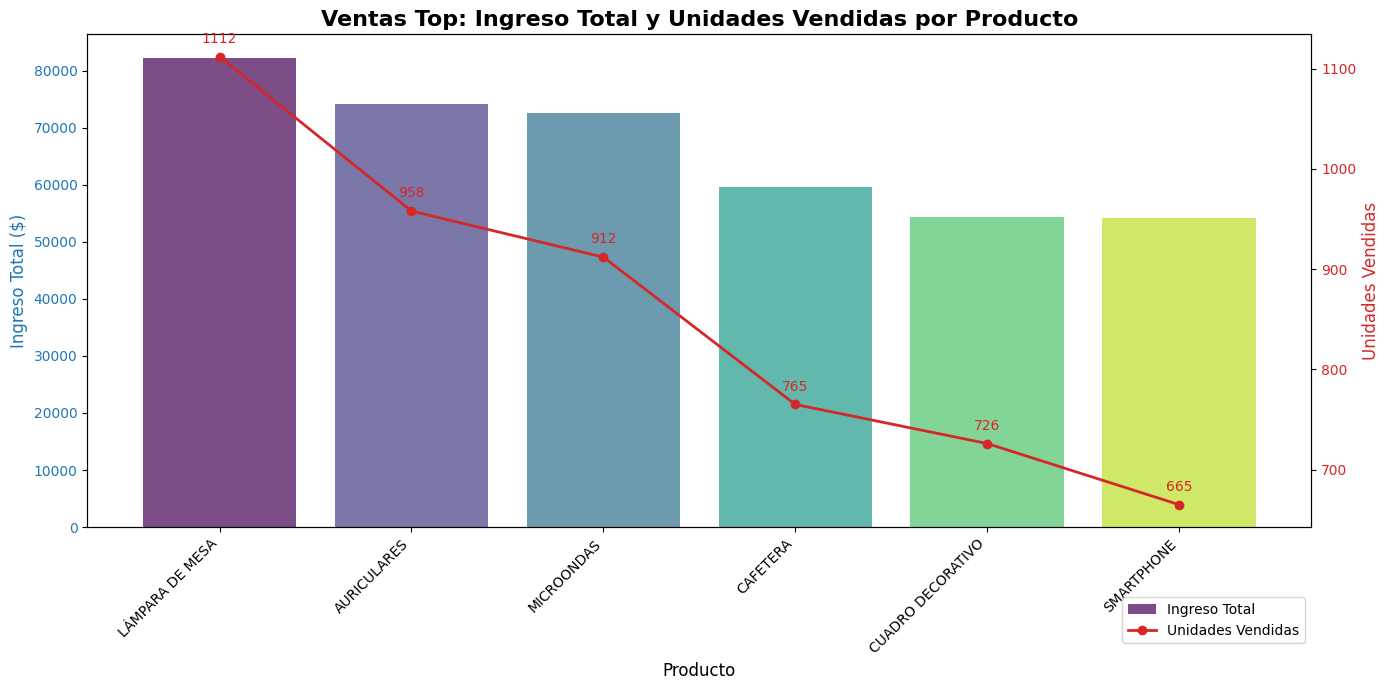

In [119]:
import matplotlib.pyplot as plt
import pandas as pd

# Asegurarse de que resumen_prod esté ordenado por ingreso_total para una mejor visualización
df_chart = ventas_top.sort_values(by='ingreso_total', ascending=False).copy()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Obtener una paleta de colores para las barras
colors = plt.cm.viridis(np.linspace(0, 0.9, len(df_chart['producto'])))

# Eje Y1 para Ingreso Total (Barras)
ax1.set_xlabel('Producto', fontsize=12)
ax1.set_ylabel('Ingreso Total ($)', color='tab:blue', fontsize=12)
ax1.bar(df_chart['producto'], df_chart['ingreso_total'], color=colors, alpha=0.7, label='Ingreso Total')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45, ha='right') # Rotamos a 45 grados y ajustamos alineación

# Eje Y2 para Unidades (Línea)
ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
ax2.set_ylabel('Unidades Vendidas', color='tab:red', fontsize=12)
ax2.plot(df_chart['producto'], df_chart['unidades'], color='tab:red', marker='o', linestyle='-', linewidth=2, label='Unidades Vendidas')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Añadir etiquetas de unidades sobre los puntos de la línea
for i, txt in enumerate(df_chart['unidades']):
    ax2.annotate(f'{txt:.0f}', (df_chart['producto'].iloc[i], df_chart['unidades'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='tab:red', fontsize=10)

# Título del gráfico
plt.title('Ventas Top: Ingreso Total y Unidades Vendidas por Producto', fontsize=16, weight='bold')

# Añadir leyenda combinada y moverla a la parte inferior derecha
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right', bbox_to_anchor=(1, -0.25))

fig.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()


###**Resumen:**
Para identificar los productos de alto rendimiento, es decir, aquellos que se encuentran en el 20% superior en términos de ingreso_total, se realizaron una serie de pasos:

1. Obtener el percentil 80: 52,518.85.
Esto significa que el 80% de los productos tuvieron un ingreso_total igual o inferior a $52,518.85, y el 20% restante superó este valor.
2. Se crea el df ventas_top para incluir solo aquellos productos cuyo ingreso_total fuera mayor o igual a 52,518.85.
Posteriormente, estos productos se ordenaron de forma descendente por ingreso_total y, en caso de empate, por unidades vendidas.
3. Como resultado, el df ventas_top contiene una lista de los 6 productos de "alto rendimiento" (el top 20% con mayores ingresos).
Estos productos son:
- LÁMPARA DE MESA: 82,276.38
- AURICULARES: 74,175.58
- MICROONDAS: 72,562.89
- CAFETERA: 59,607.31
- CUADRO DECORATIVO: 54,297.60
- SMARTPHONE: 54,132.44
4. Realización de un gráfico combinado, donde se observa una correlación positiva: los productos con mayor ingreso_total  tienden a tener también un mayor volumen de unidades vendidas.
Los productos de Alto Rendimiento contribuyen tanto en valor monetario como en volumen.Por ejemplo, LÁMPARA DE MESA, AURICULARES y MICROONDAS destacan en ambos aspectos, mostrando que son tanto populares como generadores de ingresos significativos.

**Conclusión**: Este análisis nos permite identificar claramente cuáles son los productos que más contribuyen a los ingresos totales, proporcionando una base sólida para enfocar estrategias de marketing, gestión de inventario y desarrollo de productos. Los productos por debajo de este umbral podrían necesitar una reevaluación o campañas específicas para mejorar su rendimiento.


## 3️⃣ Agregación

*Objetivo: Resumir las ventas por categoría de producto y analizar los ingresos generados*


In [120]:
# Detectar columna de categoría (acepta variantes) invocando a la función "encontrar_columna"
cat_col = encontrar_columna(ventas_clean, ["category","categoria", "categoría", "categoria_producto", "rubro","id_categoria"])
if cat_col is None:
    print("No se encontró columna de categoría (por ej. 'categoria' o 'rubro').")
else:
    print("El nombre de la columna es: ",cat_col)

El nombre de la columna es:  categoria


In [121]:
display(ventas_clean.head())

,id_venta,producto,precio,cantidad,fecha_venta,categoria
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS


In [122]:
# Crear columna 'ingreso'
if "ingreso" not in ventas_clean.columns:
    ventas_cat = ventas_clean.assign(ingreso = ventas_clean["precio"] * ventas_clean["cantidad"])
else:
    ventas_cat = ventas_clean.copy()

display(ventas_cat.head())



,id_venta,producto,precio,cantidad,fecha_venta,categoria,ingreso
0,792,CUADRO DECORATIVO,69.94,5,2024-01-02,DECORACIÓN,349.7
1,811,LÁMPARA DE MESA,105.10,5,2024-01-02,DECORACIÓN,525.5
2,1156,SECADORA,97.96,3,2024-01-02,ELECTRODOMÉSTICOS,293.88
3,1372,HELADERA,114.35,8,2024-01-02,ELECTRODOMÉSTICOS,914.8
4,1546,SECADORA,106.21,4,2024-01-02,ELECTRODOMÉSTICOS,424.84


In [123]:
# Agregación por categoría con groupby + agg
resumen_cat = (
    ventas_cat
    .groupby(
        by=cat_col,      # Puede ser string o lista de strings si quisiéramos agrupar por varias columnas.
        dropna=False,    # Mantener grupo NaN (si hay filas sin categoría).
        as_index=False   # Dejar la categoría como columna normal (y no como índice).
        # observed: si cat_col es 'category' y queremos mostrar solo categorías presentes → True.
    )
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma total de ingresos por categoría.
        unidades=('cantidad', 'sum'),       # Unidades totales vendidas en la categoría.
        ventas=('ingreso', 'size'),         # Cantidad de registros/filas (ventas) en la categoría.
        precio_promedio=('precio', 'mean')  # Precio promedio observado en la categoría.
        # Otras funciones útiles: 'median','max','min','std','var','nunique'...
    )
    .sort_values(
        by='ingreso_total', # Ordenar por ingreso total
        ascending=False,    # Descendente: mayores arriba
        na_position='last', # NaN al final
        ignore_index=True   # Reindexar desde 0
    )
    .round({'ingreso_total':2,'precio_promedio': 2}) # Round precio_promedio to 2 decimal places
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52
1,ELECTRÓNICA,483092.88,6420,999,75.25
2,DECORACIÓN,479645.76,6496,1001,74.10


In [124]:
# Ticket promedio por venta = ingreso_total / ventas
resumen_cat = resumen_cat.assign(
    ticket_promedio_por_venta = (resumen_cat['ingreso_total'] / resumen_cat['ventas']).round(2)
    # assign: crea/reescribe columnas.
)

display(resumen_cat)

,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,483092.88,6420,999,75.25,483.58
2,DECORACIÓN,479645.76,6496,1001,74.10,479.17


In [125]:
#Mostrar los valores obtenidos por categoría
print("Columna de categoría detectada:", cat_col)
print("Resumen por categoría (ordenado por ingreso_total):")
display(resumen_cat.head(20))


Columna de categoría detectada: categoria
Resumen por categoría (ordenado por ingreso_total):


,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta
0,ELECTRODOMÉSTICOS,505299.63,6592,1000,76.52,505.3
1,ELECTRÓNICA,483092.88,6420,999,75.25,483.58
2,DECORACIÓN,479645.76,6496,1001,74.10,479.17


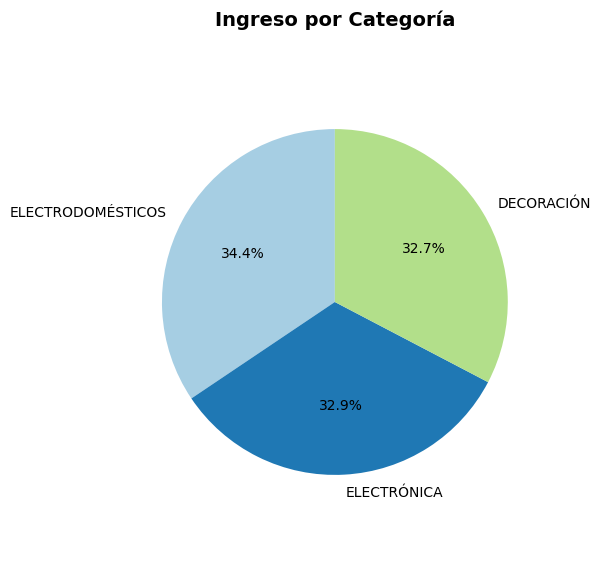

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Preparar los datos para el gráfico de pastel
labels = resumen_cat['categoria']
sizes = resumen_cat['ingreso_total']

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
ax.axis('equal')  # Asegura que el pastel sea circular.
ax.set_title('Ingreso por Categoría', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()


###Resumen:

Observaciones Clave:

ELECTRODOMÉSTICOS: Representa la mayor proporción, lo que sugiere que las ventas en esta categoría, son las de mayor valor. Esto podría deberse a productos de alto costo unitario o a que los clientes compran artículos más caros en esta categoría.
ELECTRÓNICA y DECORACIÓN: Sus proporciones son algo menores que la de Electrodomésticos, pero aún significativas. Esto indica que también contribuyen sustancialmente a los ingresos de las ventas.

- Los productos vendidos están agrupados en 3 categorías
- La categoría con mayor ingreso es *Electrodomésticos*, seguido por Electrónica y finalmente Decoración.
- Se registran 1000, 999 y 1001 ventas según la categoría.
- El precio promedio para la categoría Electrodomésticos es de 76.52, para Electrónica es de 75.25 y Decoración de 74.10

##  4️⃣ Integración de datos
*Objetivo: Combinar los sets de datos de ventas y marketing para obtener una visión más amplia de las tendencias.*


In [127]:
#agrupo el df de ventas clean por producto y sumo la cantidad por el precio
df_ventas_x_producto = ventas_clean.groupby(['producto', 'categoria']).agg(
    precio_por_cantidad=('precio', lambda x: (x * ventas_clean.loc[x.index, 'cantidad']).sum())
).reset_index() # Añadido .reset_index() aquí

# Selecciono solo las columnas necesarias (ya están incluidas por el groupby y reset_index)
# Corregido 'categoría' a 'categoria'
df_ventas_x_producto = df_ventas_x_producto[['producto', 'categoria','precio_por_cantidad']]

# Ordeno por producto de forma ascendente
df_ventas_x_producto = df_ventas_x_producto.sort_values(by='producto', ascending=True)

# Redondear a dos decimales
df_ventas_x_producto['precio_por_cantidad'] = df_ventas_x_producto['precio_por_cantidad'].round(2)

# muestro resultado
display(df_ventas_x_producto)

,producto,categoria,precio_por_cantidad
0,ADORNO DE PARED,DECORACIÓN,48093.49
1,ALFOMBRA,DECORACIÓN,44773.06
2,ASPIRADORA,ELECTRODOMÉSTICOS,50085.86
3,AURICULARES,ELECTRÓNICA,74175.58
4,BATIDORA,ELECTRODOMÉSTICOS,50979.20
5,CAFETERA,ELECTRODOMÉSTICOS,59607.31
6,CANDELABRO,DECORACIÓN,11128.80
7,CONSOLA DE VIDEOJUEGOS,ELECTRÓNICA,46174.41
8,CORTINAS,DECORACIÓN,44865.03
9,CUADRO DECORATIVO,DECORACIÓN,54297.60


In [128]:
# costo de las campañas por producto (sumo todos los canales)
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto
df_marketing_x_producto = marketing_clean.groupby('producto')['costo'].sum().reset_index()
# Selecciono solo las columnas necesarias
df_marketing_x_producto = df_marketing_x_producto[['producto', 'costo']]
#Ordeno por producto de manera ascendente
df_marketing_x_producto = df_marketing_x_producto.sort_values(by='producto', ascending=True)
#Muestro el resultado obtenido
display(df_marketing_x_producto)

,producto,costo
0,ADORNO DE PARED,14.05
1,ALFOMBRA,17.46
2,ASPIRADORA,16.46
3,AURICULARES,15.24
4,BATIDORA,15.28
5,CAFETERA,18.16
6,CANDELABRO,14.65
7,CONSOLA DE VIDEOJUEGOS,12.77
8,CORTINAS,17.36
9,CUADRO DECORATIVO,15.85


In [129]:
# costo de las campañas por canal (sumo todos los productos)
#agrupo marketing clean por producto y sumo el costo de las campañas de ese producto
df_marketing_x_canal = marketing_clean.groupby('canal')['costo'].sum().reset_index()
# Selecciono solo las columnas necesarias
df_marketing_x_canal = df_marketing_x_canal[['canal', 'costo']]
#Ordeno por producto de manera ascendente
df_marketing_x_canal = df_marketing_x_canal.sort_values(by='costo', ascending=False)
#Muestro el resultado obtenido
display(df_marketing_x_canal)

,canal,costo
1,RRSS,150.91
2,TV,147.47
0,EMAIL,145.20


Basado en los costos por canal de marketing se puede concluir que:

- RRSS (Redes Sociales) es el canal con el costo más alto, con 150.91.
- Le sigue TV con un costo de 147.47.
- Finalmente, EMAIL es el canal con el costo más bajo, registrando 145.20.

Esto sugiere que, entre los canales analizados, la inversión en redes sociales es la más significativa, aunque las diferencias entre los tres canales son relativamente pequeñas.

In [130]:
#mergeo el df ventas agrupado por producto con el de marketing agrupado por producto
merged_df = pd.merge(df_ventas_x_producto, df_marketing_x_producto, on='producto')
display(merged_df)

,producto,categoria,precio_por_cantidad,costo
0,ADORNO DE PARED,DECORACIÓN,48093.49,14.05
1,ALFOMBRA,DECORACIÓN,44773.06,17.46
2,ASPIRADORA,ELECTRODOMÉSTICOS,50085.86,16.46
3,AURICULARES,ELECTRÓNICA,74175.58,15.24
4,BATIDORA,ELECTRODOMÉSTICOS,50979.20,15.28
5,CAFETERA,ELECTRODOMÉSTICOS,59607.31,18.16
6,CANDELABRO,DECORACIÓN,11128.80,14.65
7,CONSOLA DE VIDEOJUEGOS,ELECTRÓNICA,46174.41,12.77
8,CORTINAS,DECORACIÓN,44865.03,17.36
9,CUADRO DECORATIVO,DECORACIÓN,54297.60,15.85


In [131]:
#Costo sobre el ingreso
merged_df['porcentaje_costo_sobre_ingreso'] = (merged_df['costo'] / merged_df['precio_por_cantidad']) * 100
display(merged_df)

,producto,categoria,precio_por_cantidad,costo,porcentaje_costo_sobre_ingreso
0,ADORNO DE PARED,DECORACIÓN,48093.49,14.05,0.029214
1,ALFOMBRA,DECORACIÓN,44773.06,17.46,0.038997
2,ASPIRADORA,ELECTRODOMÉSTICOS,50085.86,16.46,0.032864
3,AURICULARES,ELECTRÓNICA,74175.58,15.24,0.020546
4,BATIDORA,ELECTRODOMÉSTICOS,50979.20,15.28,0.029973
5,CAFETERA,ELECTRODOMÉSTICOS,59607.31,18.16,0.030466
6,CANDELABRO,DECORACIÓN,11128.80,14.65,0.131640
7,CONSOLA DE VIDEOJUEGOS,ELECTRÓNICA,46174.41,12.77,0.027656
8,CORTINAS,DECORACIÓN,44865.03,17.36,0.038694
9,CUADRO DECORATIVO,DECORACIÓN,54297.60,15.85,0.029191


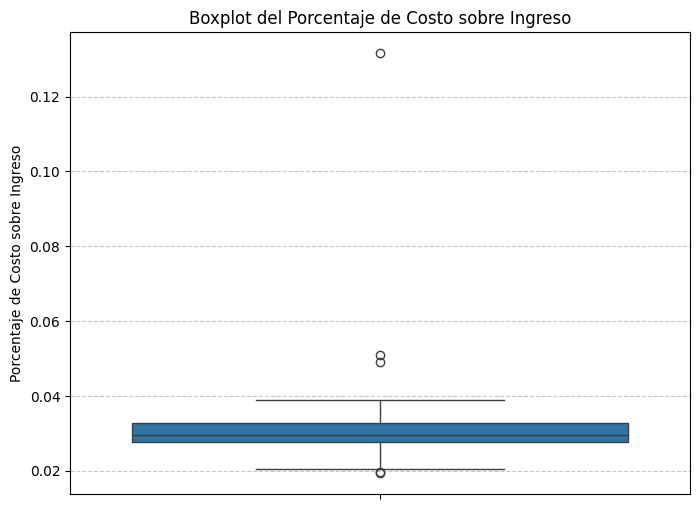

In [132]:
# Gráfico Boxplot para identificar dispersión y posibles outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df['porcentaje_costo_sobre_ingreso'])
plt.title('Boxplot del Porcentaje de Costo sobre Ingreso')
plt.ylabel('Porcentaje de Costo sobre Ingreso')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Conclusión del Boxplot de 'Porcentaje de Costo sobre Ingreso'

Al analizar el Boxplot generado para el `porcentaje_costo_sobre_ingreso` (la proporción del costo de marketing respecto al ingreso total por producto), se observa lo siguiente:

*   **Mediana y Concentración Central:** La mayoría de los productos tiene un porcentaje de costo sobre ingreso entre **aprox 2.5% y 4%**.

*   **Dispersión:** La mayoría de los productos tienen una eficiencia similar.

*   **Outliers (Valores Atípicos):** Los puntos individuales fuera de los bigotes representan productos con una relación costo/ingreso inusualmente alta o baja.
    *   Basado en el `dataframe` el **'CANDELABRO'** (con un % de aprox. **13.16%**) se destaca claramente como un **outlier superior**. Esto indica que, para este producto, el costo de marketing es significativamente más alto en proporción a los ingresos generados en comparación con la mayoría de los otros productos.
    *   El producto **'HELADERA'** (con aproximadamente **5.09%**) también se encuentra en el rango superior.

**Conclusión Clave:**
La presencia del outlier 'CANDELABRO', 'HELADERA', es una señal importante. Sugiere que, si bien la mayoría de los productos muestran una eficiencia de marketing razonablemente consistente (con porcentajes de costo sobre ingreso relativamente bajos), estos productos requieren una porción desproporcionadamente grande de sus ingresos para cubrir los costos de marketing. Esto podría indicar:

*   **Problemas de rentabilidad:** Para el 'CANDELABRO', la inversión en marketing podría no estar justificándose por los ingresos, lo que podría requerir una reevaluación de la estrategia de marketing, el precio o incluso la viabilidad del producto.
*   **Diferencias inherentes:** Algunos productos simplemente requieren más inversión en marketing debido a su naturaleza.


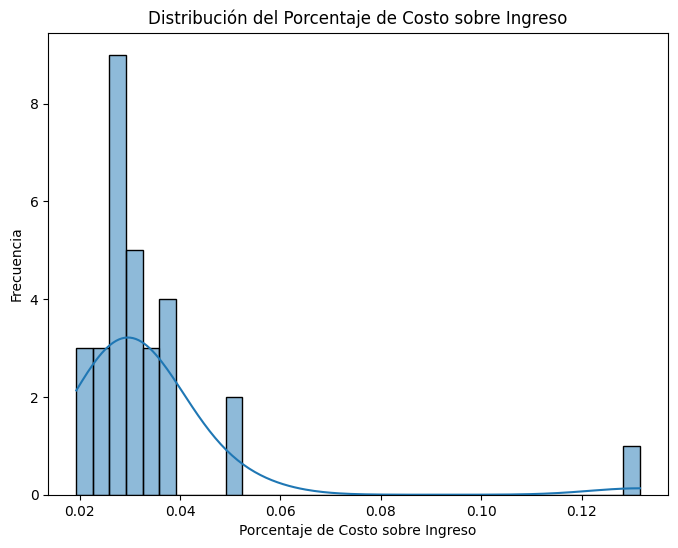

In [133]:
# Gráfico Histograma para analizar la distribución de % de costo sobre ingresos
plt.figure(figsize=(8, 6))
sns.histplot(merged_df['porcentaje_costo_sobre_ingreso'], kde=True)
plt.title('Distribución del Porcentaje de Costo sobre Ingreso')
plt.xlabel('Porcentaje de Costo sobre Ingreso')
plt.ylabel('Frecuencia')
plt.show()

**Conclusión:**

- Concentración de la Mayoría: existe una alta frecuencia de productos con un porcentaje_costo_sobre_ingreso bajo, concentrándose la mayoría entre aproximadamente el **2.5% y el 4%.** Esto indica que, para la gran mayoría de los productos, **el costo de marketing representa una proporción relativamente pequeña de sus ingresos**.

- Distribución Asimétrica (Sesgada a la Derecha):  se puede observar que hay una cola más larga hacia valores más altos de porcentaje de costo sobre ingreso. Esta cola representada por el 'CANDELABRO' y la 'HELADERA' que tienen un costo de marketing desproporcionadamente alto en relación con sus ingresos.

- Identificación Visual de Outliers: hay barras muy pequeñas que se extiende hacia la derecha en valores donde la frecuencia es muy baja, confirmando la existencia de productos que se desvían significativamente del patrón general de eficiencia de marketing.

En resumen, en este gráfico se visualiza claramente que, si bien la mayoría de los productos son eficientes en su relación costo/ingreso, existen algunos casos atípicos que requieren una mayor inversión relativa en marketing. Esta visualización refuerza la necesidad de investigar las razones detrás de esos altos porcentajes en ciertos productos y considerar si la estrategia de marketing o el rendimiento de ventas necesitan ser ajustados para ellos.

# 🔍: Etapa 3: Análisis de Datos
**Objetivo:** Realizar análisis estadístico y exploratorio sobre los datos procesados.

##1️⃣ Estadística Descriptiva

####**Objetivos:**
* Calcular medidas de tendencia central y dispersión sobre las ventas.
* Presentar los resultados en un informe.


###Ingresos Totales por Producto

In [134]:
display(resumen_prod)

,producto,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,82276.38,1112,72.72,176
3,AURICULARES,74175.58,958,76.30,143
20,MICROONDAS,72562.89,912,79.18,135
5,CAFETERA,59607.31,765,79.05,117
9,CUADRO DECORATIVO,54297.6,726,74.58,100
26,SMARTPHONE,54132.44,665,81.40,101
25,SECADORA,52115.45,696,73.34,100
16,JARRÓN DECORATIVO,51130.88,672,74.53,100
4,BATIDORA,50979.2,672,77.54,100
24,RINCÓN DE PLANTAS,50456.45,691,74.82,101


In [135]:
#Agregar la categoría del producto
resumen_prod = (
    ventas_perf
    # 1) Agrupamos el DataFrame por una o varias columnas clave
    .groupby(
        by=[prod_col,cat_col],    # Ahora agrupamos por producto Y categoría
        dropna=False,   # False → NO descarta filas donde la clave de grupo tenga NaN; crea un grupo para NaN.
        as_index=False, # False → las columnas de agrupación quedan como columnas normales (no pasan al índice).
        observed=False  # Solo aplica si 'prod_col' es Categorical:
                        #   False → incluye categorías NO observadas (posibles pero sin filas);
                        #   True  → solo categorías que aparecen en los datos (más rápido y “compact”).
    )
    # 2) Agregamos (resumimos) columnas numéricas por cada grupo
    .agg(
        ingreso_total=('ingreso', 'sum'),   # Suma de 'ingreso' por grupo (skipna=True por defecto).
        unidades=('cantidad', 'sum'),       # Suma de 'cantidad' por grupo.
        precio_promedio=('precio', 'mean'), # Promedio simple de 'precio' por grupo (ignora NaN).
        registros=('ingreso', 'size')       # Número de filas en el grupo (cuenta TODO, incluso NaN).
    )
    # Ordenar resultado por ingreso_total Descending y rendondear el ingreso_total y precio_promedio a 2 decimales
    .sort_values(by='ingreso_total', ascending=False)
    .round({'ingreso_total': 2, 'precio_promedio': 2})
)
#Visualizar el resultado
display(resumen_prod)

,producto,categoria,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,DECORACIÓN,82276.38,1112,72.72,176
3,AURICULARES,ELECTRÓNICA,74175.58,958,76.30,143
20,MICROONDAS,ELECTRODOMÉSTICOS,72562.89,912,79.18,135
5,CAFETERA,ELECTRODOMÉSTICOS,59607.31,765,79.05,117
9,CUADRO DECORATIVO,DECORACIÓN,54297.6,726,74.58,100
26,SMARTPHONE,ELECTRÓNICA,54132.44,665,81.40,101
25,SECADORA,ELECTRODOMÉSTICOS,52115.45,696,73.34,100
16,JARRÓN DECORATIVO,DECORACIÓN,51130.88,672,74.53,100
4,BATIDORA,ELECTRODOMÉSTICOS,50979.2,672,77.54,100
24,RINCÓN DE PLANTAS,DECORACIÓN,50456.45,691,74.82,101


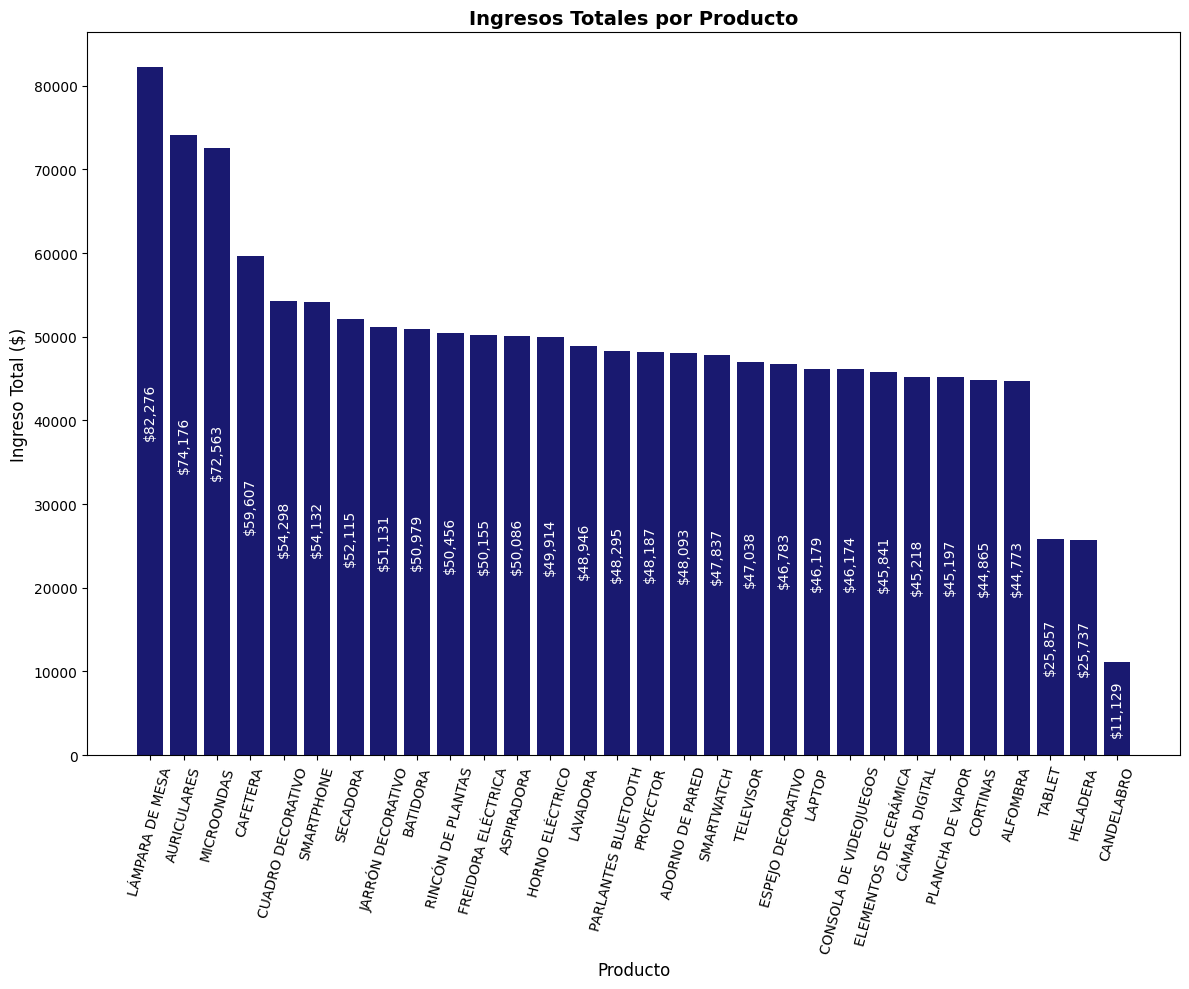

In [136]:
# Gráfico de barra con los datos del **df resumen_prod**, el cual está agrupado por producto con ingreso_total por producto
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================
df = resumen_prod.copy()
# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(12, 10))

# Definimos un color celeste agradable para las barras
color_barra = "#191970"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_barra aplica el color definido arriba
barras = plt.bar(df_ordenado["producto"], df_ordenado["ingreso_total"], color=color_barra)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Producto", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=75)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=10,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()


In [137]:
# Obtener las medidas de tendencia central y dispersión
media = df['ingreso_total'].mean()
mediana = df['ingreso_total'].median()
moda = df['ingreso_total'].mode()
rango = df['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df['ingreso_total'].var(ddof=1)
desviacion = df['ingreso_total'].std(ddof=1)

print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print("Moda de Ingreso Total:")
print(moda)
print(f"Rango de Ingreso Total: {rango:,.2f}")
print(f"Varianza de Ingreso Total, {varianza:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")



Media de Ingreso Total: 48,934.61
Mediana de Ingreso Total: 48,240.77
Moda de Ingreso Total:
0      11128.8
1      25736.8
2     25856.57
3     44773.06
4     44865.03
5     45196.63
6     45217.96
7     45840.76
8     46174.41
9     46179.48
10    46783.31
11    47038.04
12    47836.86
13    48093.49
14     48187.0
15    48294.54
16    48946.44
17     49913.9
18    50085.86
19    50155.15
20    50456.45
21     50979.2
22    51130.88
23    52115.45
24    54132.44
25     54297.6
26    59607.31
27    72562.89
28    74175.58
29    82276.38
Name: ingreso_total, dtype: Float64
Rango de Ingreso Total: 71,147.58
Varianza de Ingreso Total, 175,846,223.71
Desviación Estándar de Ingreso Total: 13,260.70


**Conclusión:**

Al analizar la media, la mediana y la moda de los ingresos totales por producto, se pueden extraer las siguientes conclusiones sobre la distribución del rendimiento de los productos:

- Media (48.934,61) vs. Mediana (48.240,77): La media es ligeramente superior a la mediana, lo que señala que la distribución de los ingresos totales por producto tiene una **ligera asimetría positiva** (o sesgo a la derecha). Esto implica que hay algunos productos con ingresos significativamente más altos que están elevando el promedio, mientras que la mayoría de los productos se encuentran en un rango de ingresos más cercano o inferior a la mediana.

- Moda: La ausencia de una moda única y predominante refuerza la idea de que existe una **variedad considerable en el rendimiento individual** de los productos. No hay un nivel de ingreso que sea el más común entre los productos, lo que subraya la heterogeneidad de la cartera.

- Desviación Estándar (13.260,70): Una desviación estándar de 13.260,70 es significativa en relación con la media de 48.934,61 (aproximadamente un 27% de la media). Esto indica una **dispersión considerable** en los ingresos de los productos. Los ingresos de los productos individuales se alejan mucho del promedio, mostrando que no todos los productos generan ingresos de manera uniforme.

- Rango (71.147,58): El amplio rango de 71.147,58 (desde 11.128,80 hasta 82.276,38) confirma esta **gran variabilidad** entre los productos. Hay una diferencia sustancial entre el producto que menos vende y el que más vende, lo cual es un indicador clave de la existencia de productos con rendimientos muy dispares.

- Varianza (175.846.223,71): La varianza es un valor elevado, lo que corrobora la alta dispersión de los datos. Los ingresos de los productos están lejos de ser homogéneos.


La cartera de productos no es uniforme en su contribución a los ingresos, ya que existen productos con un rendimiento muy superior y otros con un rendimiento considerablemente inferior. Esta heterogeneidad es vital para la toma de decisiones estratégicas, como:

- Identificación de Oportunidades: Enfocar los esfuerzos de marketing y ventas en los productos de alto rendimiento.
- Evaluación de Riesgos: Analizar los productos de bajo rendimiento para determinar si requieren mejoras, ajustes en el precio, o si deben ser descontinuados.
- Diversificación: Entender la dispersión ayuda a evaluar si la dependencia de unos pocos productos "estrella" es sostenible o si se necesita impulsar otros productos para equilibrar el portafolio.
- La desviación estándar nos dice que, en promedio, los ingresos individuales de los productos se desvían bastante del ingreso promedio general, lo cual es una característica fundamental para entender la dinámica comercial del negocio.

In [138]:
#Cálculo del rango intercuartílico (IQR) para Ingresos totales por productos
#El IQR mide la dispersión del 50% central de los datos y se calcula como: [ IQR = Q3 - Q1 ]
#Es menos sensible a los outliers.
# Interpretación: El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.
q1 = df['ingreso_total'].quantile(0.25)
q2 = df['ingreso_total'].quantile(0.5)
q3 = df['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print(f"Q1: {q1:,.2f}")
print(f"Q2 (Mediana): {q2:,.2f}")
print(f"Q3: {q3:,.2f}")
print(f"IQR:{iqr:,.2f}")

Q1: 45,924.17
Q2 (Mediana): 48,240.77
Q3: 51,092.96
IQR:5,168.79


In [139]:
### Detección de outliers usando el IQR
#Límite inferior = Q1 − (1.5 × IQR)
#Límite superior = Q3 + (1.5 × IQR)

lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df[(df['ingreso_total'] < lim_inf) | (df['ingreso_total'] > lim_sup)]

print(f"Límite inferior:{lim_inf:,.2f}" )
print(f"Límite superior:{lim_sup:,.2f}" )
print("\nOutliers detectados:")
print(outliers)

Límite inferior:38,170.99
Límite superior:58,846.14

Outliers detectados:
           producto          categoria  ingreso_total  unidades  \
19  LÁMPARA DE MESA         DECORACIÓN       82276.38      1112   
3       AURICULARES        ELECTRÓNICA       74175.58       958   
20       MICROONDAS  ELECTRODOMÉSTICOS       72562.89       912   
5          CAFETERA  ELECTRODOMÉSTICOS       59607.31       765   
28           TABLET        ELECTRÓNICA       25856.57       374   
14         HELADERA  ELECTRODOMÉSTICOS        25736.8       330   
6        CANDELABRO         DECORACIÓN        11128.8       160   

    precio_promedio  registros  
19            72.72        176  
3             76.30        143  
20            79.18        135  
5             79.05        117  
28            71.38         58  
14            74.13         48  
6             74.60         24  


### 📊 Boxplot Interactivo de Ingresos Totales por Producto con Outliers y Límites

In [140]:
import plotly.express as px
import pandas as pd

# Asegurémonos de que 'df' (resumen_prod) esté disponible y tenga la columna 'ingreso_total'
# Si no lo está, podríamos cargarlo o usar 'resumen_prod' directamente

# Crear un boxplot interactivo usando Plotly
# Plotly es excelente para boxplots porque permite interactividad (zoom, hover para ver valores)
fig = px.box(
    resumen_prod, # Usamos el DataFrame que contiene los ingresos por producto
    y='ingreso_total', # La columna que queremos analizar
    title='Boxplot de Ingreso Total por Producto', # Título del gráfico
    labels={'ingreso_total': 'Ingreso Total ($)'}, # Etiqueta del eje Y
    points='all' # Mostrar todos los puntos (outliers y puntos dentro de los 'whiskers')
)

# Añadir líneas para los límites inferior y superior calculados
# Estos límites son útiles para comparar con la definición de outliers del boxplot
fig.add_hline(y=lim_inf, line_dash='dash', line_color='red', annotation_text=f'Límite Inferior: {lim_inf:,.2f}')
fig.add_hline(y=lim_sup, line_dash='dash', line_color='green', annotation_text=f'Límite Superior: {lim_sup:,.2f}')

# Mostrar el gráfico
fig.show()

print(f"Q1: {q1:,.2f}")
print(f"Q2 (Mediana): {q2:,.2f}")
print(f"Q3: {q3:,.2f}")
print(f"IQR: {iqr:,.2f}")
print(f"Límite inferior: {lim_inf:,.2f}")
print(f"Límite superior: {lim_sup:,.2f}")
print("\nOutliers detectados:\n")
display(outliers)


Q1: 45,924.17
Q2 (Mediana): 48,240.77
Q3: 51,092.96
IQR: 5,168.79
Límite inferior: 38,170.99
Límite superior: 58,846.14

Outliers detectados:



,producto,categoria,ingreso_total,unidades,precio_promedio,registros
19,LÁMPARA DE MESA,DECORACIÓN,82276.38,1112,72.72,176
3,AURICULARES,ELECTRÓNICA,74175.58,958,76.30,143
20,MICROONDAS,ELECTRODOMÉSTICOS,72562.89,912,79.18,135
5,CAFETERA,ELECTRODOMÉSTICOS,59607.31,765,79.05,117
28,TABLET,ELECTRÓNICA,25856.57,374,71.38,58
14,HELADERA,ELECTRODOMÉSTICOS,25736.8,330,74.13,48
6,CANDELABRO,DECORACIÓN,11128.8,160,74.60,24


#### Conclusión del Boxplot de Ingreso Total por Producto

Se obtiene una visión clara de la distribución, tendencia central y dispersión de los ingresos totales por producto, y se identifican los valores atípicos (outliers) utilizando el Rango Intercuartílico (IQR).

*   **Identificación de Productos Clave:** Los outliers superiores: 'LÁMPARA DE MESA', 'AURICULARES', 'MICROONDAS', 'CAFETERA' representan productos de muy alto rendimiento, que están generando ingresos mucho mayores que la mayoría. Por otro lado, los outliers inferiores 'TABLET', 'HELADERA', 'CANDELABRO' son productos con ingresos inusualmente bajos.


###Ingresos Totales por Categorías

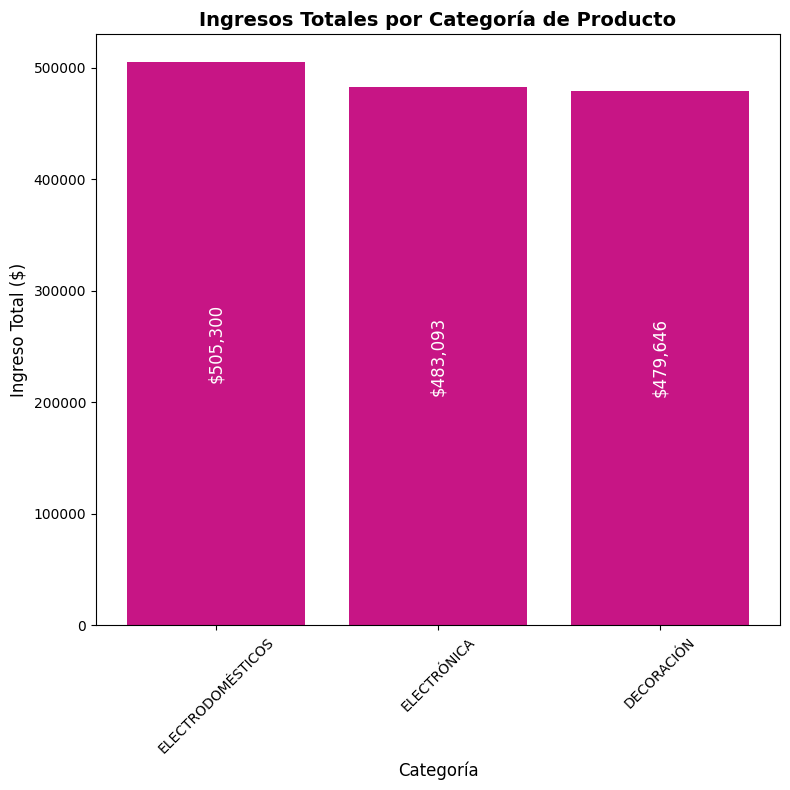

In [141]:
# Se toma el df resumen_cat, tiene un agrupado por categoria con ingreso_total por categoria realizamos un grafico
df2 = resumen_cat.copy()
# =========================================
# 📊 Gráfico de barras con etiquetas verticales dentro de cada barra
# =========================================

# Importamos la librería de gráficos matplotlib
import matplotlib.pyplot as plt

# Ordenamos el DataFrame por la columna "ingreso_total" de mayor a menor
# Esto permite que las barras se muestren ordenadas por el monto de ventas
df_ordenado = df2.sort_values("ingreso_total", ascending=False)

# Creamos la figura donde se va a dibujar el gráfico
# figsize define el tamaño del gráfico (ancho, alto) en pulgadas
plt.figure(figsize=(8, 8))

# Definimos un color celeste agradable para las barras
color_barra = "#C71585"

# Creamos las barras del gráfico
# Eje X → nombre de producto
# Eje Y → ingreso total
# color=color_barra aplica el color definido arriba
barras = plt.bar(df_ordenado["categoria"], df_ordenado["ingreso_total"], color=color_barra)

# Agregamos un título al gráfico con tamaño de fuente 14 y en negrita
plt.title("Ingresos Totales por Categoría de Producto", fontsize=14, weight="bold")

# Etiquetamos los ejes
plt.xlabel("Categoría", fontsize=12)        # Eje X
plt.ylabel("Ingreso Total ($)", fontsize=12)  # Eje Y

# Rotamos las etiquetas del eje X para que los nombres de los productos se lean bien
plt.xticks(rotation=45)

# Recorremos cada barra dibujada para agregar el valor de ingreso dentro de ella
for barra in barras:
    # Obtenemos la altura de la barra (equivale al valor de ingreso_total)
    y = barra.get_height()

    # Escribimos el texto dentro de la barra
    plt.text(
        barra.get_x() + barra.get_width() / 2,  # posición horizontal: centro de la barra
        y / 2,                                  # posición vertical: mitad de la barra
        f"${y:,.0f}",                           # texto formateado con separador de miles
        ha='center',                            # alineación horizontal centrada
        va='center',                            # alineación vertical centrada
        fontsize=12,                             # tamaño de fuente pequeño
        color="white",                          # texto blanco para contrastar con el celeste
        rotation=90                             # rotamos el texto 90° para que quede vertical
    )

# Ajustamos automáticamente los márgenes del gráfico para que no se corte nada
plt.tight_layout()

# Mostramos el gráfico final
plt.show()

In [142]:
# Obtener las medidas de tendencia central y dispersión
media = df2['ingreso_total'].mean()
mediana = df2['ingreso_total'].median()
moda = df2['ingreso_total'].mode()
rango = df2['ingreso_total'].max() - df['ingreso_total'].min()
varianza = df2['ingreso_total'].var(ddof=1)
desviacion = df2['ingreso_total'].std(ddof=1)

print(f"Media de Ingreso Total: {media:,.2f}")
print(f"Mediana de Ingreso Total: {mediana:,.2f}")
print("Moda de Ingreso Total:")
print(moda)
print(f"Rango de Ingreso Total: {rango:,.2f}")
print(f"Varianza de Ingreso Total, {varianza:,.2f}")
print(f"Desviación Estándar de Ingreso Total: {desviacion:,.2f}")

Media de Ingreso Total: 489,346.09
Mediana de Ingreso Total: 483,092.88
Moda de Ingreso Total:
0    479645.76
1    483092.88
2    505299.63
Name: ingreso_total, dtype: Float64
Rango de Ingreso Total: 494,170.83
Varianza de Ingreso Total, 193,857,237.97
Desviación Estándar de Ingreso Total: 13,923.26


**Conclusión:**
Al analizar la media, la mediana y la moda de los ingresos totales por categoría, podemos extraer las siguientes conclusiones:

- Media (489.346,09) vs. Mediana (483.092,88): la media es ligeramente superior a la mediana, lo que indica una **ligera asimetría positiva** en la distribución de los ingresos por categoría, sugiriendo que hay una categoría (o categorías) con ingresos notablemente más altos que tiran del promedio hacia arriba, aunque la mayoría se agrupe alrededor de la mediana.

- Moda (Múltiples Valores): cada categoría tiene un ingreso total distinto.

- Desviación Estándar (13.923,26):  Existe una **dispersión moderada** en los ingresos entre las categorías. Aunque hay diferencias, no son extremas; las categorías no están excesivamente alejadas del ingreso promedio por categoría.

- Rango (25.653,87): la diferencia entre la categoría con mayor ingreso (Electrodomésticos) y la de menor ingreso (Decoración), es de 25.653,87. Este valor confirma una **variabilidad existente pero controlada** entre las categorías.

- Varianza (193.857.237,97):existe una variación en los ingresos de las categorías, pero no es tan extrema como para indicar una disparidad inmanejable.

En resumen, los ingresos por categoría muestran una distribución relativamente equilibrada, aunque con una ligera inclinación hacia los Electrodomésticos. A pesar de que los Electrodomésticos lideran en ingresos, la baja desviación estándar y el rango moderado indican que las tres categorías contribuyen de manera significativa al ingreso total. No hay una categoría que sea un outlier extremo o que esté rezagada de forma drástica. Esta homogeneidad relativa entre categorías es positiva y puede indicar una estrategia de negocio bien diversificada a nivel de categorías, aunque siempre con la líder (Electrodomésticos) atrayendo la mayor parte de la atención.


In [143]:
#Cálculo del rango intercuartílico (IQR) para Ingresos totales por categorías
#El IQR mide la dispersión del 50% central de los datos y se calcula como: [ IQR = Q3 - Q1 ]
#Es menos sensible a los outliers.
# Interpretación: El IQR refleja el rango donde se encuentran las ventas normales, sin verse afectado por los outliers.
q1 = df2['ingreso_total'].quantile(0.25)
q2 = df2['ingreso_total'].quantile(0.5)
q3 = df2['ingreso_total'].quantile(0.75)
iqr = q3 - q1

print(f"Q1: {q1:,.2f}")
print(f"Q2 (Mediana): {q2:,.2f}")
print(f"Q3: {q3:,.2f}")
print(f"IQR:{iqr:,.2f}")

Q1: 481,369.32
Q2 (Mediana): 483,092.88
Q3: 494,196.26
IQR:12,826.93


In [144]:
### Detección de outliers usando el IQR
#Límite inferior = Q1 − (1.5 × IQR)
#Límite superior = Q3 + (1.5 × IQR)
lim_inf = q1 - 1.5 * iqr
lim_sup = q3 + 1.5 * iqr

outliers = df2[(df2['ingreso_total'] < lim_inf) | (df2['ingreso_total'] > lim_sup)]

print(f"Límite inferior:{lim_inf:,.2f}" )
print(f"Límite superior:{lim_sup:,.2f}" )
print("\nOutliers detectados:")
print(outliers)

Límite inferior:462,128.92
Límite superior:513,436.66

Outliers detectados:
Empty DataFrame
Columns: [categoria, ingreso_total, unidades, ventas, precio_promedio, ticket_promedio_por_venta]
Index: []


### 📊 Boxplot Interactivo de Ingresos Totales por Categorías con Outliers y Límites


In [145]:
import plotly.express as px
import pandas as pd

# Asegurémonos de que 'df' (resumen_prod) esté disponible y tenga la columna 'ingreso_total'
# Si no lo está, podríamos cargarlo o usar 'resumen_prod' directamente

# Crear un boxplot interactivo usando Plotly
# Plotly es excelente para boxplots porque permite interactividad (zoom, hover para ver valores)
fig = px.box(
    resumen_cat, # Usamos el DataFrame que contiene los ingresos por producto
    y='ingreso_total', # La columna que queremos analizar
    title='Boxplot de Ingreso Total por Categoría', # Título del gráfico
    labels={'ingreso_total': 'Ingreso Total ($)'}, # Etiqueta del eje Y
    points='all' # Mostrar todos los puntos (outliers y puntos dentro de los 'whiskers')
)

# Añadir líneas para los límites inferior y superior calculados
# Estos límites son útiles para comparar con la definición de outliers del boxplot
fig.add_hline(y=lim_inf, line_dash='dash', line_color='red', annotation_text=f'Límite Inferior: {lim_inf:,.2f}')
fig.add_hline(y=lim_sup, line_dash='dash', line_color='green', annotation_text=f'Límite Superior: {lim_sup:,.2f}')

# Mostrar el gráfico
fig.show()

print(f"Q1: {q1:,.2f}")
print(f"Q2 (Mediana): {q2:,.2f}")
print(f"Q3: {q3:,.2f}")
print(f"IQR: {iqr:,.2f}")
print(f"Límite inferior: {lim_inf:,.2f}")
print(f"Límite superior: {lim_sup:,.2f}")
print("\nOutliers detectados:\n")
display(outliers)

Q1: 481,369.32
Q2 (Mediana): 483,092.88
Q3: 494,196.26
IQR: 12,826.93
Límite inferior: 462,128.92
Límite superior: 513,436.66

Outliers detectados:



,categoria,ingreso_total,unidades,ventas,precio_promedio,ticket_promedio_por_venta


####Conclusión del Boxplot de Ingreso Total por Categoría

**Conclusión Clave:**

El boxplot de ingresos por categoría refuerza la idea de una distribución homogénea y bien equilibrada entre las categorías. La ausencia de outliers y la caja relativamente compacta indican que no hay categorías que generen ingresos desproporcionadamente más altos o más bajos que las demás, al menos según los criterios del IQR. Todas las categorías se encuentran dentro del rango esperado de ingresos, lo que sugiere una contribución consistente y sólida de cada una al ingreso total del negocio.



## 2️⃣ Análisis Exploratorio de Datos (EDA)

 #### **Objetivo**:
 ####  Realizar un análisis exploratorio utilizando visualizaciones para identificar patrones y tendencias en las ventas.


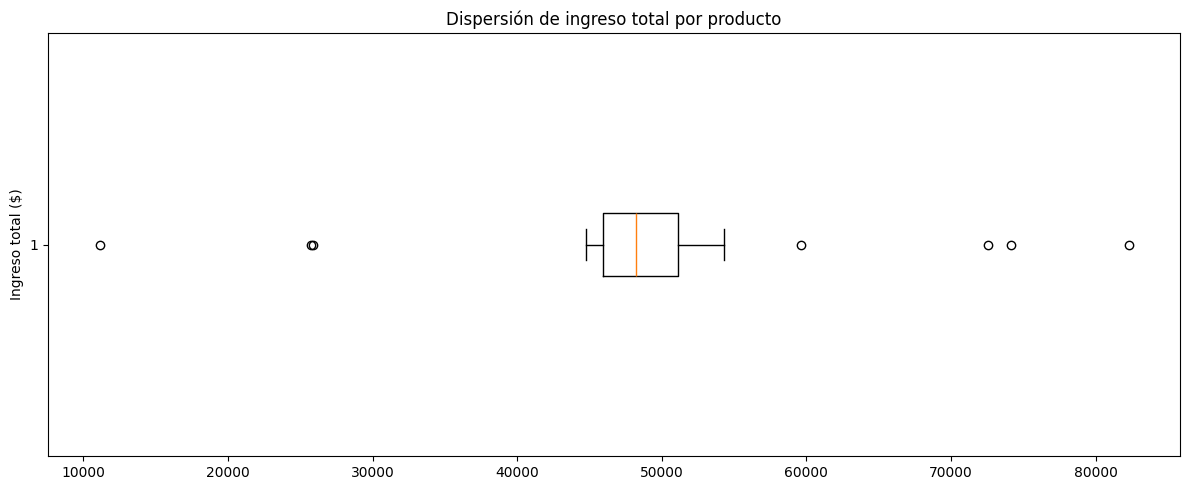

In [146]:
# =========================================
# 📦 Boxplot: dispersión de ingreso_total (por producto)
# =========================================
# Búsqueda de patrones y tendencias en las ventas usando visualizaciones simples.

import matplotlib.pyplot as plt  # importamos matplotlib

vals = resumen_prod['ingreso_total'].dropna()  # tomamos valores numéricos y quitamos NaN

plt.figure(figsize=(12, 5))                     # tamaño del gráfico
plt.boxplot(vals, vert=False)                   # dibujamos boxplot vertical
plt.title('Dispersión de ingreso total por producto')  # título
plt.ylabel('Ingreso total ($)')                # etiqueta del eje Y
plt.tight_layout()                              # ajustar márgenes
plt.show()                                      # mostrar gráfico

**Resumen:** Boxplot de Ingresos Totales por Producto

Este gráfico nos proporcia una visión detallada de la distribución del ingreso total generado por cada producto, identificando claramente dónde se concentra la mayoría de los ingresos y qué productos se desvían.

1. Concentración y Tendencia Central:
- La mediana (48,240.77) indica que la mitad de los productos generaron ingresos por debajo de este valor y la otra mitad por encima.
- La caja central del Boxplot (del Q1 al Q3, es decir, de 45,924.17 a 51,092.96) abarca el 50% central de los productos. Esto muestra que la mayoría se agrupan en un rango de ingresos relativamente estrecho, indicando una base de rendimiento consistente para gran parte del catálogo.

2. Dispersión y Variabilidad:
- La longitud de los bigotes y la extensión de los puntos individuales revelan que, aunque la parte central es densa, existe una variabilidad significativa en el rendimiento de los productos.

3. Identificación de Outliers (Productos Destacados y Rezagados):
- Outliers Superiores (Productos de Alto Rendimiento): productos como 'LÁMPARA DE MESA', 'AURICULARES', 'MICROONDAS' y 'CAFETERA' son outliers superiores. Estos productos generan ingresos significativamente más altos que la mayoría de los demás, superando el límite superior de 58,846.14. Son tus "productos estrella" y merecen especial atención para potenciarlos.
- Outliers Inferiores (Productos de Bajo Rendimiento): También se identificaron productos como 'TABLET', 'HELADERA' y 'CANDELABRO' como outliers inferiores, con ingresos por debajo del límite inferior de 38,170.99. Esto indica que estos productos tienen un rendimiento más bajo que la mayoría y podrían requerir una reevaluación de su estrategia, precio o incluso su continuidad.

**Conclusión General: **
Se observa que una gran parte del catálogo de productos tiene un rendimiento de ingresos similar, pero la verdadera clave para la estrategia se encuentra en los extremos de la distribución, ya que existen productos que son grandes generadores de ingresos y otros que están arrastrando el rendimiento general. Esta visualización es crucial para dirigir acciones de marketing y gestión de inventario de manera específica y efectiva, enfocándose en **maximizar el potencial de los productos estrella** y abordar los desafíos de los productos de bajo rendimiento.

## 3️⃣ Correlación

####**Objetivo:**
#### Evaluar la relación entre diferentes variables (por ejemplo,precio y cantidad vendida) y mostrar los resultados en un gráfico.

### Precio Promedio vs. Unidades Vendidas

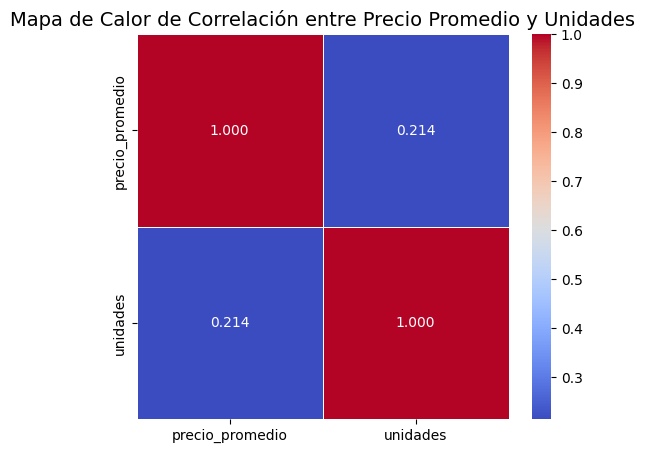

In [147]:
# 📊 Mapa de Calor de Correlación
# =========================================
# 🔵 Correlación: precio_promedio vs unidades (por producto)
# =========================================
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés
df_corr = resumen_prod[['precio_promedio', 'unidades']]

# Calcular la matriz de correlación
correlation_matrix = df_corr.corr()

# Crear el mapa de calor
plt.figure(figsize=(6, 5))
sns.heatmap(
    correlation_matrix,
    annot=True,      # Mostrar los valores de correlación en el mapa de calor
    cmap='coolwarm', # Elegir un mapa de colores (coolwarm para destacar +/- correlación)
    fmt=".3f",       # Formato de los números a dos decimales
    linewidths=.5    # Espacio entre celdas
)
plt.title('Mapa de Calor de Correlación entre Precio Promedio y Unidades', fontsize=14)
plt.show()


#### Interpretación del Mapa de Calor:

Este mapa de calor muestra la matriz de correlación entre `precio_promedio` y `unidades`.

*   **Diagonal Principal (1.00):** 1.00 en la diagonal, una variable siempre se correlaciona perfectamente consigo misma.
*   **Valor Fuera de la Diagonal:** El valor clave relaciona `precio_promedio` con `unidades`. Este valor (anteriormente calculado como `0.214` con el coeficiente de Pearson) indica la **fuerza y dirección de la relación lineal** entre estas dos variables.

**Conclusión Específica:**

El valor de `0.214` en el mapa de calor confirma una **relación positiva débil a moderada** entre el `precio_promedio` y las `unidades` vendidas. Esto sugiere que, en general, los productos con un precio promedio ligeramente más alto tienden a vender un poco más de unidades, pero la relación no es muy fuerte. Es importante recordar que la correlación no implica causalidad y solo mide relaciones lineales.

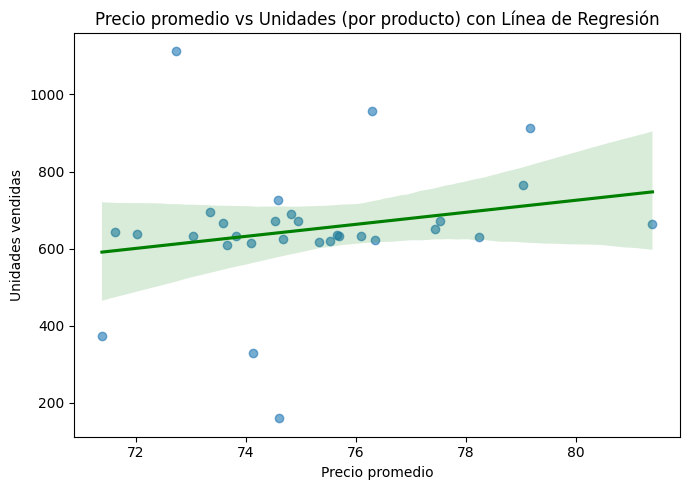

In [148]:
# Gráfico de dispersión con línea de regresión
import matplotlib.pyplot as plt
import seaborn as sns # Importamos seaborn para regplot

x = resumen_prod['precio_promedio']  # eje X: precio promedio por producto
y = resumen_prod['unidades']         # eje Y: unidades vendidas por producto

plt.figure(figsize=(7, 5))           # tamaño del gráfico
sns.regplot(x=x, y=y, scatter_kws={'alpha':0.6}, line_kws={'color':'green'}) # Gráfico de dispersión con línea de regresión
plt.title('Precio promedio vs Unidades (por producto) con Línea de Regresión')  # título actualizado
plt.xlabel('Precio promedio')        # etiqueta eje X
plt.ylabel('Unidades vendidas')      # etiqueta eje Y
plt.tight_layout()                   # ajustar márgenes
plt.show()

####Conclusiones de la Relación entre Precio Promedio y Unidades Vendidas

**Observación del Gráfico de Dispersión:**

- El gráfico de dispersión mostró una tendencia general donde, a medida que el precio_promedio aumenta (moviéndose hacia la derecha en el eje X), las unidades vendidas también tienden a aumentar (moviéndose hacia arriba en el eje Y). Sin embargo, esta tendencia no es una línea recta perfecta, sino que los puntos están bastante dispersos, lo que sugiere que la relación no es extremadamente fuerte o que hay otros factores influyendo.

- Coeficiente de Correlación de Pearson (r ≈ 0.214):
El cálculo del coeficiente de correlación de Pearson arrojó un valor de aproximadamente +0.214. Según la interpretación estándar, esto indica una **relación positiva débil a moderada** entre ambas variables.
Un valor positivo significa que, en general, cuando una variable aumenta, la otra también tiende a aumentar.

- La calificación de "débil a moderada" confirma lo que se observaba visualmente en el gráfico de dispersión: aunque hay una tendencia alcista, esta no es lo suficientemente fuerte como para predecir con alta precisión las unidades vendidas basándose solo en el precio promedio.



In [149]:
# =========================================
# 📌 Coeficiente de correlación (precio_promedio vs unidades)
# =========================================

# Calculamos el coeficiente de correlación de Pearson con pandas (método corr)
corr_val = resumen_prod[['precio_promedio','unidades']].corr().loc['precio_promedio','unidades']

print(f"Coeficiente de correlación (Pearson): {corr_val:.3f}")
# Interpretación simple:
if corr_val > 0.5:
    print("Interpretación: relación positiva clara (a mayor precio_promedio, suelen venderse más unidades).")
elif corr_val > 0.2:
    print("Interpretación: relación positiva débil a moderada.")
elif corr_val < -0.5:
    print("Interpretación: relación negativa clara (a mayor precio_promedio, suelen venderse menos unidades).")
elif corr_val < -0.2:
    print("Interpretación: relación negativa débil a moderada.")
else:
    print("Interpretación: relación muy débil o nula.")


Coeficiente de correlación (Pearson): 0.214
Interpretación: relación positiva débil a moderada.


**Conclusión General:**

Los datos sugieren que en este contexto existe una ligera tendencia positiva. Esto implica que los productos con un precio_promedio ligeramente más alto tienden a vender un poco más de unidades. Esta relación no es muy fuerte, lo que indica que el precio no es el único ni el factor dominante que impulsa las ventas. Es probable que otros elementos como la **calidad percibida, la funcionalidad, la categoría del producto o las campañas de marketing** tengan un peso significativo en la decisión de compra.

En resumen, el precio promedio no parece ser un factor que disuada las ventas; más bien, productos con precios algo más elevados pueden ser percibidos con mayor valor, manteniendo o incluso aumentando ligeramente su volumen de unidades vendidas. Sin embargo, la debilidad de la correlación sugiere que se necesitan más análisis para identificar los verdaderos impulsores del volumen de ventas.

### Cantidad de Ventas vs Unidades Vendidas vs Ingresos generados

In [150]:
# Analizar cantidad de ventas, unidades vendidas e ingresos generados, dentro de las fechas de las campañas para cada producto
# 1. Realizar un merge entre ventas_perf y marketing_clean en la columna 'producto'
# Se utiliza un merge tipo 'inner' para obtener solo los productos que tienen tanto ventas como campañas
merged_sales_campaigns = pd.merge(
    ventas_perf, # Usamos ventas_perf que ya contiene la columna 'ingreso'
    marketing_clean,
    on='producto',
    how='inner'
)

# 2. Filtrar las ventas para que solo incluyan aquellas que ocurrieron dentro de las fechas de la campaña
# Es crucial que las columnas de fecha sean de tipo datetime para poder hacer comparaciones
merged_sales_campaigns_filtered = merged_sales_campaigns[
    (merged_sales_campaigns['fecha_venta'] >= merged_sales_campaigns['fecha_inicio']) &
    (merged_sales_campaigns['fecha_venta'] <= merged_sales_campaigns['fecha_fin'])
]

# 3. Contar la cantidad de ventas, el ingreso total y las unidades vendidas por cada campaña
sales_per_campaign = merged_sales_campaigns_filtered.groupby(
    ['id_campanha', 'producto', 'canal', 'costo', 'fecha_inicio', 'fecha_fin']
).agg(
    cant_ventas=('id_venta', 'count'),
    unidades_vendidas_campana=('cantidad', 'sum'), # Agregamos la suma de 'cantidad' aquí
    ingreso_total_campana=('ingreso', 'sum')
).reset_index()

# 4. Mostrar el resultado
print("Ventas realizadas dentro de las fechas de cada campaña (incluyendo el importe total, el canal y las unidades vendidas):")
display(sales_per_campaign.head())

print("\nInformación general del DataFrame resultante:")
sales_per_campaign.info()

Ventas realizadas dentro de las fechas de cada campaña (incluyendo el importe total, el canal y las unidades vendidas):


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,cant_ventas,unidades_vendidas_campana,ingreso_total_campana
0,1,CUADRO DECORATIVO,RRSS,5.27,2024-04-27,2024-06-04,15,98,6968.2
1,2,LÁMPARA DE MESA,RRSS,5.88,2024-05-30,2024-06-29,10,52,4238.41
2,3,SECADORA,RRSS,5.10,2024-07-24,2024-08-30,5,42,2737.14
3,4,HELADERA,RRSS,4.53,2024-05-31,2024-07-15,4,38,2674.38
4,5,HORNO ELÉCTRICO,RRSS,5.16,2024-08-22,2024-10-17,11,64,5196.41



Información general del DataFrame resultante:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_campanha                88 non-null     int64         
 1   producto                   88 non-null     object        
 2   canal                      88 non-null     object        
 3   costo                      88 non-null     float64       
 4   fecha_inicio               88 non-null     datetime64[ns]
 5   fecha_fin                  88 non-null     datetime64[ns]
 6   cant_ventas                88 non-null     int64         
 7   unidades_vendidas_campana  88 non-null     Int64         
 8   ingreso_total_campana      88 non-null     Float64       
dtypes: Float64(1), Int64(1), datetime64[ns](2), float64(1), int64(2), object(2)
memory usage: 6.5+ KB


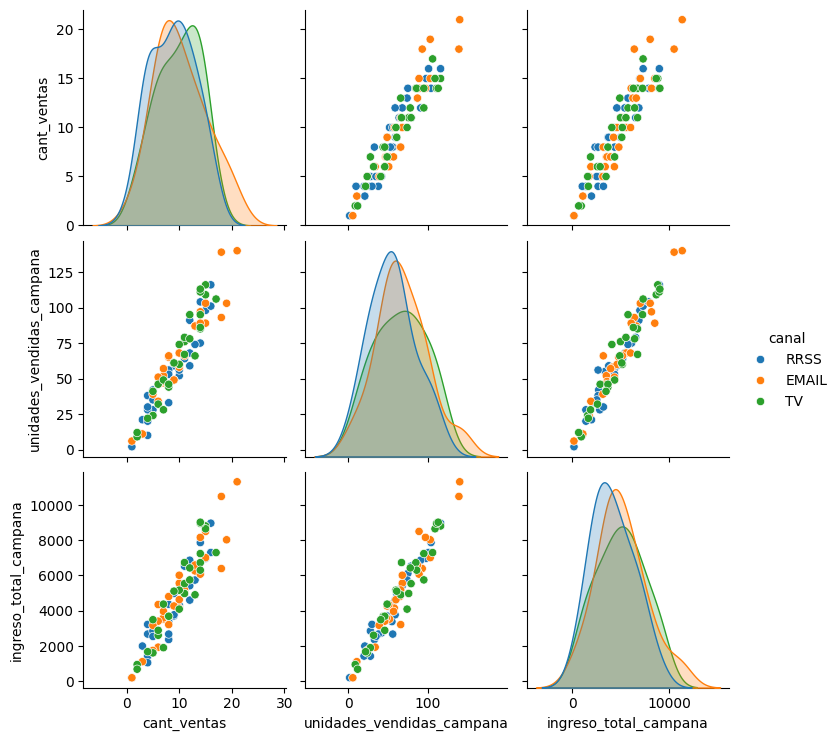

In [151]:
"""Pairplot con Seaborn"""

# Creamos un subconjunto de datos numéricos
subset = sales_per_campaign[["cant_ventas", "unidades_vendidas_campana", "ingreso_total_campana"]].copy()

# Agregamos la categoría para colorear los puntos
subset["canal"] = sales_per_campaign["canal"].values

# Dibujamos el pairplot
sns.pairplot(data=subset,      # DataFrame base
             vars=["cant_ventas", "unidades_vendidas_campana", "ingreso_total_campana"], # variables numéricas
             hue="canal"   # color según categoría
)

# Mostramos el gráfico
plt.show()

**Observaciones Generales:**

- *Relaciones Lineales Fuertes:* Todas las métricas (cant_ventas, unidades_vendidas_campana, ingreso_total_campana) muestran correlaciones positivas muy fuertes entre sí. Esto es evidente por los gráficos de dispersión diagonales (no los histogramas), donde los puntos se agrupan en una línea casi recta, indicando que cuando una métrica aumenta, las otras también lo hacen de manera proporcional.

- *cant_ventas vs. unidades_vendidas_campana:* A mayor cantidad de transacciones (ventas), mayor es el número de unidades vendidas. Esto es lógico, ya que cada venta generalmente implica una o más unidades.

- *unidades_vendidas_campana vs. ingreso_total_campana:* Un incremento en las unidades vendidas se traduce directamente en un aumento significativo de los ingresos.

- *cant_ventas vs. ingreso_total_campana:* Más transacciones conducen a mayores ingresos.

- *Distribución de Métricas:* Los histogramas muestran la distribución de cada métrica. Se observa que la mayoría de las campañas tienen una cantidad de ventas relativamente baja, un número moderado de unidades vendidas y un ingreso total también concentrado en rangos más bajos. Las distribuciones son **ligeramente sesgadas a la derecha**, indicando que existen algunas campañas con valores excepcionalmente altos en todas estas métricas.

**Observaciones por Canal (hue='canal'):**

-*RRSS (Redes Sociales):* Las campañas de RRSS (puntos azules) parecen cubrir un rango similar de valores que EMAIL y TV en las métricas observadas. No se aprecia una clara dominancia o un patrón de rendimiento muy distinto de los otros canales a primera vista en cuanto a la distribución de puntos.

-*EMAIL:* Las campañas de EMAIL (puntos naranjas) también se distribuyen a lo largo de las correlaciones, sin un patrón distintivo que las separe drásticamente de RRSS o TV en este gráfico.

-*TV:* Las campañas de TV (puntos verdes) siguen las mismas tendencias de correlación y distribución que los otros canales.

**Conclusión Clave:**

Se confirma que las tres métricas (cant_ventas, unidades_vendidas_campana, ingreso_total_campana) son altamente interdependientes y se mueven de forma conjunta. No se observan diferencias drásticas en los patrones de estas correlaciones al diferenciar por canal de marketing (RRSS, EMAIL, TV). Esto sugiere que, independientemente del canal, las campañas que logran impulsar un mayor número de transacciones y unidades vendidas son consistentemente las que generan mayores ingresos. Los tres canales parecen ser capaces de producir resultados similares en términos de estas relaciones, aunque la frecuencia o la escala de cada tipo de campaña por canal no es el foco principal de este gráfico.

##el top 10 de las mejores ventas lo podría pasar debajo.... ver

In [152]:
# Obtener Top 10 mejores ventas por producto, ordenando por ingreso_total_campana
best_sales_by_product = sales_per_campaign.sort_values(by='ingreso_total_campana', ascending=False)

print("Productos con las mejores ventas por campaña:")
display(best_sales_by_product.head(10))

Productos con las mejores ventas por campaña:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,cant_ventas,unidades_vendidas_campana,ingreso_total_campana
46,47,AURICULARES,EMAIL,4.19,2024-06-02,2024-07-22,21,140,11313.32
56,57,BATIDORA,EMAIL,4.48,2024-04-10,2024-06-08,18,139,10482.29
83,86,MICROONDAS,TV,4.25,2024-09-25,2024-11-15,14,113,9019.92
20,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16,16,116,8965.03
76,79,CAFETERA,TV,7.26,2024-08-13,2024-10-11,14,111,8955.43
60,61,CUADRO DECORATIVO,TV,5.30,2024-11-05,2024-12-23,15,116,8805.67
63,65,HORNO ELÉCTRICO,TV,3.08,2024-10-23,2024-12-11,15,109,8646.68
42,43,CORTINAS,EMAIL,5.67,2024-05-02,2024-06-17,15,89,8496.41
54,55,SMARTWATCH,EMAIL,4.59,2024-10-13,2024-12-06,14,97,8158.71
35,36,PLANCHA DE VAPOR,EMAIL,5.41,2024-04-02,2024-06-01,19,103,8023.09


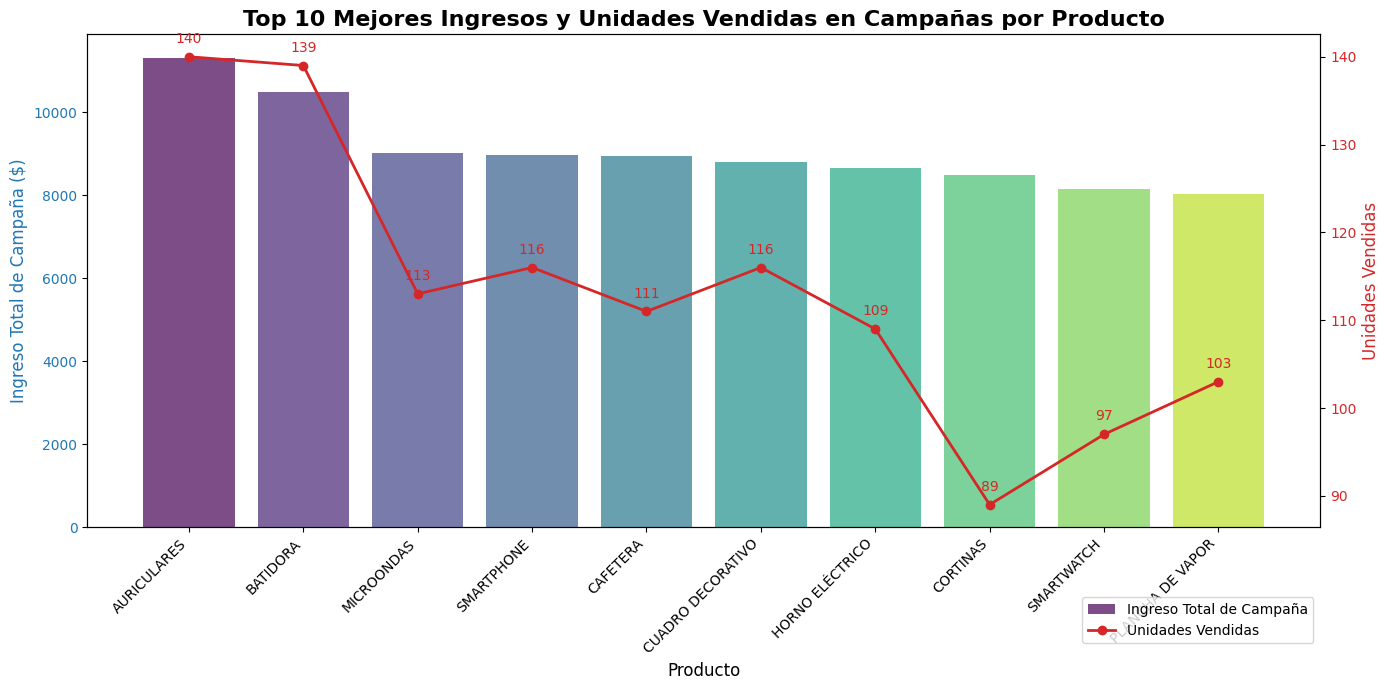

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Seleccionar el top 10 de las mejores ventas por campaña
top_10_campaign_sales = best_sales_by_product.head(10)

# Asegurarse de que top_10_campaign_sales esté ordenado por ingreso_total_campana para una mejor visualización
df_chart = top_10_campaign_sales.sort_values(by='ingreso_total_campana', ascending=False).copy()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Obtener una paleta de colores para las barras
colors = plt.cm.viridis(np.linspace(0, 0.9, len(df_chart['producto'])))

# Eje Y1 para Ingreso Total (Barras)
ax1.set_xlabel('Producto', fontsize=12)
ax1.set_ylabel('Ingreso Total de Campaña ($)', color='tab:blue', fontsize=12)
ax1.bar(df_chart['producto'], df_chart['ingreso_total_campana'], color=colors, alpha=0.7, label='Ingreso Total de Campaña')
ax1.tick_params(axis='y', labelcolor='tab:blue')
plt.xticks(rotation=45, ha='right') # Rotamos a 45 grados y ajustamos alineación

# Eje Y2 para Unidades Vendidas (Línea)
ax2 = ax1.twinx()  # Crea un segundo eje Y que comparte el mismo eje X
ax2.set_ylabel('Unidades Vendidas', color='tab:red', fontsize=12)
ax2.plot(df_chart['producto'], df_chart['unidades_vendidas_campana'], color='tab:red', marker='o', linestyle='-', linewidth=2, label='Unidades Vendidas')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Añadir etiquetas de unidades sobre los puntos de la línea
for i, txt in enumerate(df_chart['unidades_vendidas_campana']):
    ax2.annotate(f'{txt:.0f}', (df_chart['producto'].iloc[i], df_chart['unidades_vendidas_campana'].iloc[i]),
                 textcoords="offset points", xytext=(0,10), ha='center', color='tab:red', fontsize=10)

# Título del gráfico
plt.title('Top 10 Mejores Ingresos y Unidades Vendidas en Campañas por Producto', fontsize=16, weight='bold')

# Añadir leyenda combinada y moverla a la parte inferior derecha
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='lower right', bbox_to_anchor=(1, -0.25))

fig.tight_layout()  # Ajustar el layout para evitar solapamientos
plt.show()

####**Observaciones Clave:**

- Relación entre Ingresos y Unidades: Se puede observar, en general, que los productos con mayores ingresos también suelen tener un alto volumen de unidades vendidas (por ejemplo, AURICULARES, BATIDORA, MICROONDAS). Esto indica que no solo son productos de alto valor, sino que también son populares en términos de cantidad.
- Productos Destacados: AURICULARES encabeza la lista tanto en ingresos como en unidades vendidas en sus respectivas campañas.
- Comparación de Métricas: Podemos identificar rápidamente si un producto genera altos ingresos por tener un precio unitario elevado (incluso con menos unidades) o por un gran volumen de ventas.
- Esta visualización nos permite entender la estrategia de las campañas más exitosas y cómo se comportan los productos clave en términos de valor y volumen.



###Análisis de las medidas de dispersión en las Campañas

#####**Objetivo:** entender qué campañas están fuera de rango


In [154]:
# Definir las columnas para las cuales se calcularán las medidas
metrics_to_analyze = [
    'ingreso_total_campana',
    'unidades_vendidas_campana',
    'cant_ventas'
]

print("### Medidas de Dispersión para Campañas ###\n")

# Iterar sobre cada métrica y calcular las medidas descriptivas
for metric in metrics_to_analyze:
    print(f"--- Análises para la métrica: '{metric}' ---")

    # Convertir a float para asegurar cálculos correctos si el tipo de dato lo requiere (especialmente con Float64 de pandas)
    values = sales_per_campaign[metric].astype(float)

    # a. Media
    media = values.mean()
    # b. Mediana
    mediana = values.median()
    # c. Desviación estándar
    desviacion_estandar = values.std()

    # d. Primer cuartil (Q1)
    q1 = values.quantile(0.25)
    # e. Segundo cuartil (Q2) - Mediana
    q2 = values.quantile(0.50)
    # f. Tercer cuartil (Q3)
    q3 = values.quantile(0.75)
    # g. Rango Intercuartílico (IQR)
    iqr = q3 - q1

    # h. Límite inferior para outliers
    limite_inferior = q1 - (1.5 * iqr)
    # i. Límite superior para outliers
    limite_superior = q3 + (1.5 * iqr)

    # Imprimir los resultados
    print(f"  Media: {media:,.2f}")
    print(f"  Mediana: {mediana:,.2f}")
    print(f"  Desviación Estándar: {desviacion_estandar:,.2f}")
    print(f"  Q1 (Primer Cuartil): {q1:,.2f}")
    print(f"  Q2 (Mediana): {q2:,.2f}")
    print(f"  Q3 (Tercer Cuartil): {q3:,.2f}")
    print(f"  IQR (Rango Intercuartílico): {iqr:,.2f}")
    print(f"  Límite Inferior para Outliers: {limite_inferior:,.2f}")
    print(f"  Límite Superior para Outliers: {limite_superior:,.2f}\n")


### Medidas de Dispersión para Campañas ###

--- Análises para la métrica: 'ingreso_total_campana' ---
  Media: 4,736.45
  Mediana: 4,486.16
  Desviación Estándar: 2,414.96
  Q1 (Primer Cuartil): 3,096.64
  Q2 (Mediana): 4,486.16
  Q3 (Tercer Cuartil): 6,399.57
  IQR (Rango Intercuartílico): 3,302.93
  Límite Inferior para Outliers: -1,857.76
  Límite Superior para Outliers: 11,353.98

--- Análises para la métrica: 'unidades_vendidas_campana' ---
  Media: 62.56
  Mediana: 60.00
  Desviación Estándar: 30.96
  Q1 (Primer Cuartil): 41.75
  Q2 (Mediana): 60.00
  Q3 (Tercer Cuartil): 86.25
  IQR (Rango Intercuartílico): 44.50
  Límite Inferior para Outliers: -25.00
  Límite Superior para Outliers: 153.00

--- Análises para la métrica: 'cant_ventas' ---
  Media: 9.62
  Mediana: 10.00
  Desviación Estándar: 4.45
  Q1 (Primer Cuartil): 6.00
  Q2 (Mediana): 10.00
  Q3 (Tercer Cuartil): 13.00
  IQR (Rango Intercuartílico): 7.00
  Límite Inferior para Outliers: -4.50
  Límite Superior para Outlie

### Gráfico de Medidas de Dispersión para Campañas




In [155]:
import plotly.express as px
import pandas as pd

#Recalcular los valores para 'ingreso_total_campana' para asegurar la consistencia con la salida de estadísticas descriptivas.
values_ingreso = sales_per_campaign['ingreso_total_campana'].astype(float)

q1_ingreso = values_ingreso.quantile(0.25)
q2_ingreso = values_ingreso.quantile(0.5)
q3_ingreso = values_ingreso.quantile(0.75)
iqr_ingreso = q3_ingreso - q1_ingreso

limite_inferior_ingreso = q1_ingreso - (1.5 * iqr_ingreso)
limite_superior_ingreso = q3_ingreso + (1.5 * iqr_ingreso)

# Create an interactive boxplot using Plotly
fig = px.box(
    sales_per_campaign, # Use the DataFrame containing campaign sales data
    y='ingreso_total_campana', # The column to analyze
    title='Boxplot Interactivo de Ingreso Total por Campaña', # Title of the chart
    labels={'ingreso_total_campana': 'Ingreso Total de Campaña ($)'}, # Label for the Y-axis
    points='all' # Show all points (outliers and points within the 'whiskers')
)

# Add lines for the calculated lower and upper outlier bounds
fig.add_hline(
    y=limite_inferior_ingreso,
    line_dash='dash',
    line_color='red',
    annotation_text=f'Límite Inferior: {limite_inferior_ingreso:,.2f}'
)
fig.add_hline(
    y=limite_superior_ingreso,
    line_dash='dash',
    line_color='green',
    annotation_text=f'Límite Superior: {limite_superior_ingreso:,.2f}'
)

# Display the chart
fig.show()

# Identify actual outlier campaigns based on the calculated limits
outliers_ingreso = sales_per_campaign[
    (sales_per_campaign['ingreso_total_campana'] < limite_inferior_ingreso) |
    (sales_per_campaign['ingreso_total_campana'] > limite_superior_ingreso)
]

print("\n--- Campañas Outliers en Ingreso Total ---")
if not outliers_ingreso.empty:
    display(outliers_ingreso[['id_campanha', 'producto', 'canal', 'ingreso_total_campana']])
else:
    print("No se detectaron outliers en 'ingreso_total_campana' según los límites del IQR.")



--- Campañas Outliers en Ingreso Total ---
No se detectaron outliers en 'ingreso_total_campana' según los límites del IQR.


#### Resumen de Medidas de Dispersión y Outliers para Campañas

**1. Ingreso Total por Campaña ('ingreso_total_campana'):**

*   **Media:** 4,736.45
*   **Mediana:** 4,486.16
*   **Desviación Estándar:** 2,414.96
*   **Q1:** 3,096.64
*   **Q3:** 6,399.57
*   **IQR:** 3,302.93
*   **Límite Inferior para Outliers:** -1,857.76
*   **Límite Superior para Outliers:** 11,353.98

**Interpretación:** La distribución del ingreso total por campaña es relativamente simétrica, con la media y la mediana muy cercanas. La desviación estándar indica una variabilidad moderada en los ingresos generados por las campañas. El boxplot interactivo confirmó que **no se detectaron campañas con un ingreso total que se considere un outlier** (valores extremos) según el método del IQR. Esto sugiere que la mayoría de las campañas tienen un rendimiento de ingresos dentro de un rango consistente, sin picos o caídas drásticas que requieran una investigación inmediata por ser atípicos.

**2. Unidades Vendidas por Campaña ('unidades_vendidas_campana'):**

*   **Media:** 62.56
*   **Mediana:** 60.00
*   **Desviación Estándar:** 30.96
*   **Q1:** 41.75
*   **Q3:** 86.25
*   **IQR:** 44.50
*   **Límite Inferior para Outliers:** -25.00
*   **Límite Superior para Outliers:** 153.00

**Interpretación:** Similar al ingreso total, las unidades vendidas por campaña muestran una distribución donde la media y la mediana están cercanas, indicando una simetría. La desviación estándar de aproximadamente 31 unidades refleja una dispersión notable en la cantidad de productos vendidos por campaña. Al igual que con los ingresos, el cálculo de los límites del IQR sugiere que la mayoría de las campañas tienen volúmenes de ventas dentro de un rango esperado.

**3. Cantidad de Ventas por Campaña ('cant_ventas'):**

*   **Media:** 9.62
*   **Mediana:** 10.00
*   **Desviación Estándar:** 4.45
*   **Q1:** 6.00
*   **Q3:** 13.00
*   **IQR:** 7.00
*   **Límite Inferior para Outliers:** -4.50
*   **Límite Superior para Outliers:** 23.50

**Interpretación:** La cantidad de transacciones por campaña también exhibe una distribución centrada alrededor de 10 ventas por campaña, con una mediana idéntica. La baja desviación estándar (4.45) y el pequeño IQR indican que la mayoría de las campañas generan un número similar de ventas, con menos variabilidad que los ingresos o las unidades vendidas. Los límites de outliers sugieren que la mayoría de las campañas se encuentran en un rango típico de número de ventas.

**Conclusión General:**

El análisis de las medidas de dispersión y la detección de outliers para las métricas clave de las campañas ('ingreso_total_campana', 'unidades_vendidas_campana', y 'cant_ventas') revelan una *consistencia general* en el rendimiento de las campañas de marketing. La ausencia de outliers extremos, especialmente en el 'ingreso_total_campana', sugiere que las *estrategias de marketing están generando resultados predecibles y estables*. No hay campañas que se destaquen por un éxito o fracaso extraordinario que necesite una investigación urgente basada solo en estas métricas. Esto podría indicar que *las campañas son generalmente efectivas y que no hay ineficiencias graves o éxitos inesperados que estén distorsionando el rendimiento general*.

### Canales de las Campañas con los Mejores Ingresos (Top 10):

Para complementar el análisis, a continuación se detallan los canales de marketing asociados a las 10 campañas con mayor ingreso total:

*   **AURICULARES**: EMAIL
*   **BATIDORA**: EMAIL
*   **MICROONDAS**: TV
*   **SMARTPHONE**: RRSS
*   **CAFETERA**: TV
*   **CUADRO DECORATIVO**: RRSS
*   **HORNO ELÉCTRICO**: RRSS
*   **CORTINAS**: TV
*   **SMARTWATCH**: EMAIL
*   **PLANCHA DE VAPOR**: RRSS

Esta información nos permite entender qué canales están siendo más efectivos para los productos de alto rendimiento y puede guiar futuras decisiones de inversión en marketing. Por ejemplo, los productos 'AURICULARES' y 'BATIDORA' tuvieron sus campañas más exitosas a través del canal 'EMAIL', mientras que 'SMARTPHONE', 'CUADRO DECORATIVO' y 'HORNO ELÉCTRICO' se destacaron en 'RRSS' (Redes Sociales).

### 📊 Mapa de Calor de Correlación: Métricas de Campaña

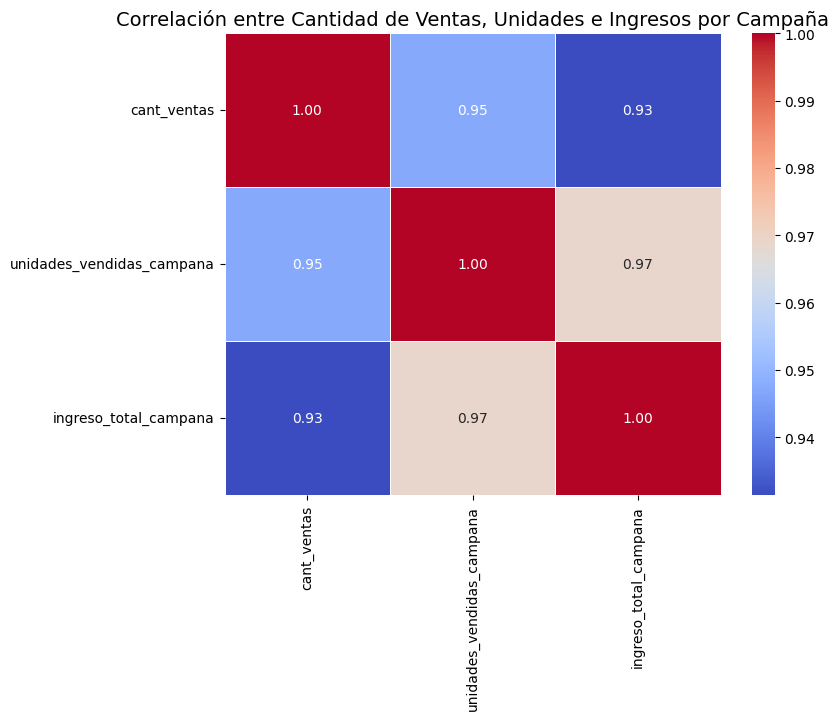

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar las columnas de interés para la correlación
df_campaign_corr = sales_per_campaign[['cant_ventas', 'unidades_vendidas_campana', 'ingreso_total_campana']]

# Calcular la matriz de correlación
correlation_matrix_campaign = df_campaign_corr.corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix_campaign,
    annot=True,      # Mostrar los valores de correlación en el mapa de calor
    cmap='coolwarm', # Elegir un mapa de colores (coolwarm para destacar +/- correlación)
    fmt=".2f",       # Formato de los números a dos decimales
    linewidths=.5    # Espacio entre celdas
)
plt.title('Correlación entre Cantidad de Ventas, Unidades e Ingresos por Campaña', fontsize=14)
plt.show()


### Conclusiones del Mapa de Calor: Cantidad de Ventas, Unidades e Ingresos por Campaña

Este mapa de calor nos permite visualizar las relaciones de correlación entre tres métricas clave para el rendimiento de las campañas:
*   `cant_ventas` (Cantidad de Ventas)
*   `unidades_vendidas_campana` (Unidades Vendidas por Campaña)
*   `ingreso_total_campana` (Ingreso Total por Campaña)

**Observaciones Clave:**

1.  **Correlaciones Altamente Positivas:**
    *   **`cant_ventas` vs. `unidades_vendidas_campana` (0.95):** Existe una correlación muy fuerte y positiva entre la cantidad de ventas y las unidades vendidas por campaña. Esto es esperado, ya que una mayor cantidad de transacciones (ventas) generalmente resulta en un mayor número de productos vendidos.
    *   **`unidades_vendidas_campana` vs. `ingreso_total_campana` (0.97):** La correlación entre las unidades vendidas y el ingreso total es extremadamente fuerte y positiva. Esto indica que un incremento en las unidades vendidas por campaña se traduce directamente en un aumento significativo de los ingresos generados por esa campaña.
    *   **`cant_ventas` vs. `ingreso_total_campana` (0.93):** También hay una correlación muy fuerte y positiva entre la cantidad de ventas y el ingreso total de la campaña, lo que significa que a más transacciones, mayores ingresos se obtienen.

2.  **Implicaciones de la Fuerza de las Correlaciones:**
    *   Los valores de correlación (Coeficiente de Pearson) cercanos a 1.00 en todas las combinaciones demuestran que estas tres métricas están **estrechamente relacionadas y se mueven en la misma dirección** de manera muy consistente. Es decir, cuando una aumenta, las otras también lo hacen de forma predecible.
    *   Esto sugiere que las campañas que logran impulsar un mayor número de transacciones (`cant_ventas`) también son exitosas en mover un gran volumen de productos (`unidades_vendidas_campana`), lo que, a su vez, genera un ingreso considerable (`ingreso_total_campana`).

**Conclusión General:**

El mapa de calor confirma que `cant_ventas`, `unidades_vendidas_campana` e `ingreso_total_campana` son métricas altamente interdependientes en el contexto de estas campañas. Las estrategias de marketing que logran aumentar una de estas métricas, probablemente verán un efecto positivo y proporcional en las otras dos. Esta fuerte correlación es una buena señal, ya que indica que las campañas son efectivas en su conjunto para generar actividad comercial y resultados financieros. No hay señales de que alguna métrica se desacople de las demás, lo que facilita la evaluación del rendimiento general de las campañas.

# 📊: Etapa 4: Visualización de Datos
**Objetivo:** Aprender a visualizar datos de manera efectiva utilizando diversas
bibliotecas

### 📊 1. Gráfico de Barras Apiladas: Categorías por Ingresos de Productos

In [157]:
import plotly.express as px
import pandas as pd

# Aseguramos que 'resumen_prod' tenga la información necesaria
# Si no está en este formato, se necesitaría un paso previo de agrupación
# resumen_prod debe tener las columnas 'categoria', 'producto', 'ingreso_total'

fig = px.bar(
    resumen_prod,
    x='categoria',
    y='ingreso_total',
    color='producto', # Esto creará las pilas por producto dentro de cada categoría
    title='Ingresos por Categoría con Detalle de Producto (Barras Apiladas)',
    labels={'ingreso_total': 'Ingreso Total ($)', 'categoria': 'Categoría', 'producto': 'Producto'},
    hover_data=['producto', 'ingreso_total'] # Para ver el producto y su ingreso al pasar el ratón
)

fig.update_layout(
    xaxis_title_text='Categoría',
    yaxis_title_text='Ingreso Total ($)',
    legend_title_text='Producto'
)
fig.show()


#### Observaciones del Gráfico de Barras Apiladas de Ingresos por Categoría:

Se puede visualizar la contribución de cada producto al ingreso total de su categoría, permitiendo una visión detallada de cómo se distribuyen las ventas dentro de cada grupo.

*   **Comparación entre Categorías:** Se puede observar fácilmente qué categoría genera la mayor cantidad de ingresos totales por la altura de su barra. La categoría ELECTRODOMÉSTICOS es la que aporta mayores ingresos, seguida por ELECTRÓNICA y luego DECORACIÓN.

*   **Contribución Individual de Productos:** Dentro de cada barra (categoría), los diferentes colores representan los productos individuales. El tamaño de cada segmento de color indica la proporción del ingreso que ese producto aporta a la categoría. Por ejemplo, en la categoría ELECTRODOMÉSTICOS, productos como 'MICROONDAS' y 'CAFETERA' son segmentos significativos. De manera similar, en ELECTRÓNICA, 'AURICULARES' y 'SMARTPHONE' se destacan.

*   **Identificación de Productos Clave por Categoría:** Esta visualización ayuda a identificar rápidamente los productos 'estrella' dentro de cada categoría, es decir, aquellos que generan una porción considerable de los ingresos. Estos productos podrían ser focos para campañas de marketing o estrategias de ventas específicas.

*   **Distribución del Ingreso:** Permite entender si el ingreso de una categoría está dominado por unos pocos productos o si está más distribuido entre varios artículos. En este caso, se observa una mezcla, donde algunas categorías tienen productos muy dominantes y otras una distribución más equitativa entre varios productos de alto rendimiento.

### 📊 2. Gráfico de Pareto: Ingresos Acumulados por Producto

Este gráfico visualiza la regla 80/20, mostrando qué productos contribuyen la mayor parte de los ingresos totales.

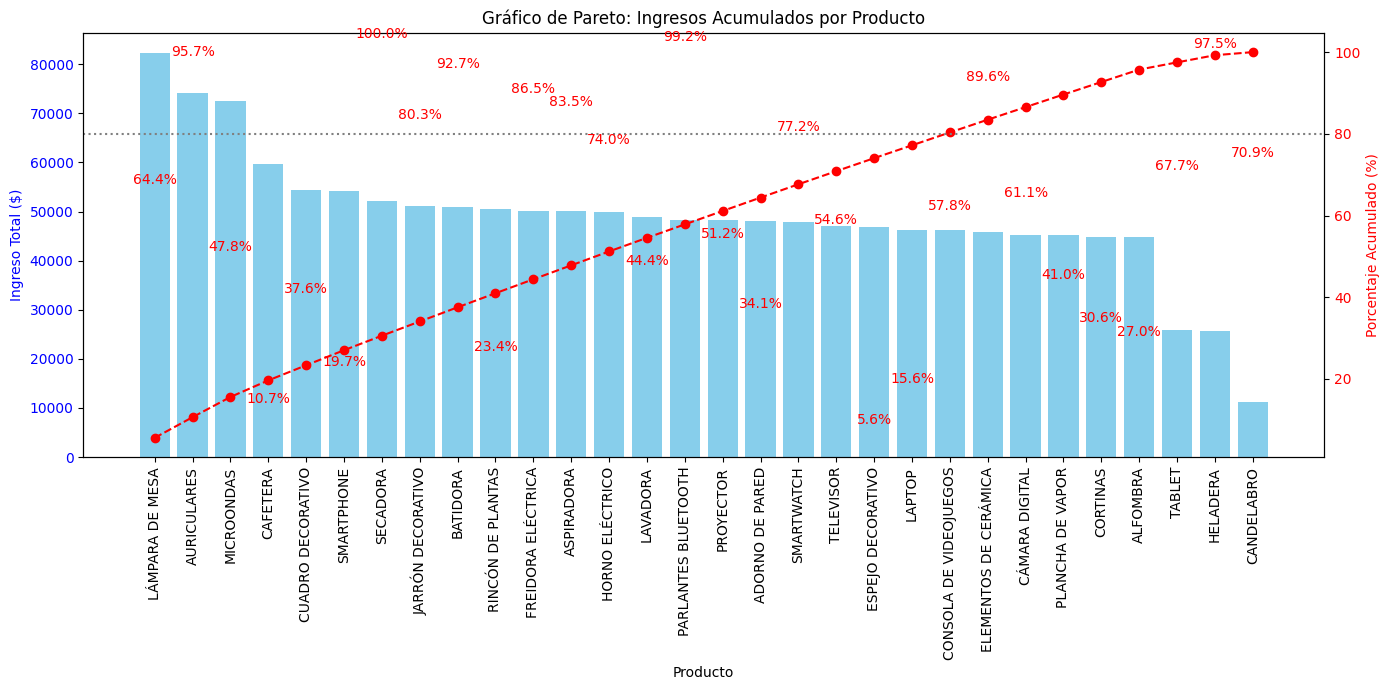

In [158]:
import matplotlib.pyplot as plt
import numpy as np

# Asegurarse de que resumen_prod esté ordenado por ingreso_total de forma descendente
df_pareto = resumen_prod.sort_values(by='ingreso_total', ascending=False).copy()

# Calcular el porcentaje de ingreso y el porcentaje acumulado
df_pareto['ingreso_porcentaje'] = (df_pareto['ingreso_total'] / df_pareto['ingreso_total'].sum()) * 100
df_pareto['ingreso_acumulado'] = df_pareto['ingreso_porcentaje'].cumsum()

fig, ax1 = plt.subplots(figsize=(14, 7))

# Gráfico de barras para el ingreso por producto
ax1.bar(df_pareto['producto'], df_pareto['ingreso_total'], color='skyblue', label='Ingreso Total por Producto')
ax1.set_xlabel('Producto')
ax1.set_ylabel('Ingreso Total ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Gráfico de Pareto: Ingresos Acumulados por Producto')
plt.xticks(rotation=90)

# Crear un segundo eje Y para el porcentaje acumulado
ax2 = ax1.twinx()
ax2.plot(df_pareto['producto'], df_pareto['ingreso_acumulado'], color='red', marker='o', linestyle='--', label='Porcentaje Acumulado')
ax2.set_ylabel('Porcentaje Acumulado (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Añadir etiquetas de porcentaje acumulado
for i, txt in enumerate(df_pareto['ingreso_acumulado']):
    ax2.annotate(f'{txt:.1f}%', (df_pareto['producto'].index[i], txt), textcoords="offset points", xytext=(0,10), ha='center', color='red')

# Dibujar una línea horizontal en el 80% para la regla 80/20
ax2.axhline(80, color='gray', linestyle=':', label='Línea del 80%')

fig.tight_layout()
plt.show()


####Conclusiones del Gráfico de Pareto: Ingresos Acumulados por Producto
Este gráfico muestra qué pocos productos contribuyen la mayor parte de los ingresos totales. Las barras representan el ingreso total de cada producto (ordenados de mayor a menor), y la línea roja muestra el porcentaje acumulado de ingresos.

**Observaciones Clave:**

- Concentración de Ingresos (Regla 80/20): Se puede observar cómo los primeros 6 productos (LÁMPARA DE MESA, AURICULARES, MICROONDAS, CAFETERA, CUADRO DECORATIVO, SMARTPHONE) representan aprox. el 64.4% de los ingresos totales.
Los primeros 12 productos (LÁMPARA DE MESA hasta JARRÓN DECORATIVO) alcanzan aproximadamente el 80.3% de los ingresos.

- Productos Estrella: Los productos que contribuyen rápidamente al porcentaje acumulado, son los productos de "alto rendimiento" o "estrella". LÁMPARA DE MESA, AURICULARES y MICROONDAS son claramente los principales generadores de ingresos.

- Productos con Menor Contribución: CANDELABRO, HELADERA y TABLET son los productos con menor impacto en los ingresos totales.

**Estrategia:**

- Enfoque en los Top: Las estrategias de marketing, inventario y promoción deberían centrarse prioritariamente en los productos que aportan la mayor parte de los ingresos. Asegurar la disponibilidad y visibilidad de LÁMPARA DE MESA, AURICULARES, MICROONDAS, CAFETERA, CUADRO DECORATIVO y SMARTPHONE.
- Optimización de Menor Rendimiento: Los productos con menor contribución podrían requerir una reevaluación, llevando a cabo campañas específicas para aumentar sus ventas, ajustes de precios, revisión del inventario para evitar el exceso de stock, o, incluso considerar la discontinuidad.

En resumen, este gráfico permite identificar dónde se deben concentrar los esfuerzos para maximizar la rentabilidad y la eficiencia en la gestión de productos.

### 📊 3. Gráfico de Dispersión (Scatter Plot) con Dimensiones Adicionales:

Explorar relaciones entre variables precio_promedio vs unidades, y se añade el ingreso_total como otra dimensión, para analizar si los productos de alto rendimiento siguen un patrón particular de precio/cantidad.

In [159]:
import plotly.express as px
import pandas as pd

# Asegurarse de que el DataFrame 'resumen_prod' esté disponible y contenga las columnas necesarias:
# 'precio_promedio', 'unidades', 'ingreso_total', 'producto', y 'categoria'.

fig = px.scatter(
    resumen_prod,
    x='precio_promedio',
    y='unidades',
    size='ingreso_total', # El tamaño del círculo representará el ingreso_total
    color='categoria',    # El color del círculo representará la categoría del producto
    hover_name='producto', # Mostrar el nombre del producto al pasar el ratón
    log_x=False,          # No aplicar escala logarítmica al eje X
    size_max=60,          # Tamaño máximo de los círculos
    title='Relación entre Precio Promedio, Unidades Vendidas e Ingreso Total por Producto',
    labels={
        'precio_promedio': 'Precio Promedio ($)',
        'unidades': 'Unidades Vendidas',
        'ingreso_total': 'Ingreso Total ($)'
    }
)

fig.update_layout(
    xaxis_title_text='Precio Promedio ($)',
    yaxis_title_text='Unidades Vendidas',
    legend_title_text='Categoría'
)

fig.show()


#### Conclusiones del Gráfico de Dispersión (Scatter Plot) con Dimensiones Adicionales

Este gráfico nos permite explorar simultáneamente la relación entre el `precio_promedio`, las `unidades vendidas` y el `ingreso_total` (representado por el tamaño del círculo) para cada producto, diferenciando además por `categoría` (color).

**Observaciones Clave:**

1.  **Relación entre Precio y Unidades:**
    *   Existencia de una **correlación positiva débil** entre el precio promedio y las unidades vendidas. En general, los productos con precios promedio ligeramente más altos tienden a vender un poco más de unidades, pero la relación no es muy fuerte y hay mucha dispersión.
    *   No hay una barrera clara donde un precio más alto signifique drásticamente menos ventas, lo que sugiere que el valor percibido del producto es más importante que el precio absoluto.

2.  **Impacto del Ingreso Total (Tamaño de los Círculos):**
    *   Los círculos más grandes (productos con mayor `ingreso_total`) no se concentran exclusivamente en un extremo del `precio_promedio` o de las `unidades vendidas`.
    *   Productos como `LÁMPARA DE MESA` (Decoración), `AURICULARES` (Electrónica) y `MICROONDAS` (Electrodomésticos) aparecen como círculos grandes en la parte superior derecha del gráfico, indicando que son productos con un precio promedio competitivo y un alto volumen de ventas, lo que resulta en un ingreso total significativo.
    *   Esto confirma que los productos de alto rendimiento logran un equilibrio entre un buen precio y una alta demanda.

3.  **Distribución por Categorías (Color de los Círculos):**
    *   Las categorías `ELECTRODOMÉSTICOS` (amarillo), `ELECTRÓNICA` (azul claro) y `DECORACIÓN` (verde claro) se mezclan en el gráfico, lo que indica que no hay una categoría que domine un rango específico de precios o unidades de forma exclusiva.
    *   Sin embargo, se puede observar que los `ELECTRODOMÉSTICOS` y `ELECTRÓNICA` tienen algunos de los puntos con mayor `ingreso_total` (círculos grandes), lo que concuerda con el análisis de ingresos por categoría, donde estas categorías mostraron ser las más rentables.
    *   `DECORACIÓN` también cuenta con puntos de buen tamaño, como `LÁMPARA DE MESA`, lo que muestra su capacidad de generar ingresos importantes.

**Conclusión General:**

El éxito de un producto (medido por su `ingreso_total`) no depende únicamente de tener el precio más bajo o el volumen de ventas más alto por separado. En cambio, los productos más exitosos son aquellos que logran un balance entre un precio competitivo y una alta cantidad de unidades vendidas.
Las diferentes categorías contribuyen de manera significativa al ingreso total, y los productos "estrella" de cada categoría muestran esta combinación de precio y volumen favorable.

### 📊 4. Gráfico de Rosquilla (Donut Chart): Proporción de Ingresos por Canal
Mostrar la contribución porcentual de cada canal al ingreso total, destacando su peso relativo.

In [160]:
df_income_by_channel = sales_per_campaign.groupby('canal')['ingreso_total_campana'].sum().reset_index()

print("Total income per marketing channel:")
display(df_income_by_channel)

Total income per marketing channel:


,canal,ingreso_total_campana
0,EMAIL,152161.04
1,RRSS,125449.52
2,TV,139197.11


In [161]:
total_income = df_income_by_channel['ingreso_total_campana'].sum()
df_income_by_channel['porcentaje_ingreso'] = (df_income_by_channel['ingreso_total_campana'] / total_income) * 100

print("Percentage contribution of each marketing channel to total product income:")
display(df_income_by_channel)

Percentage contribution of each marketing channel to total product income:


,canal,ingreso_total_campana,porcentaje_ingreso
0,EMAIL,152161.04,36.506296
1,RRSS,125449.52,30.097699
2,TV,139197.11,33.396005


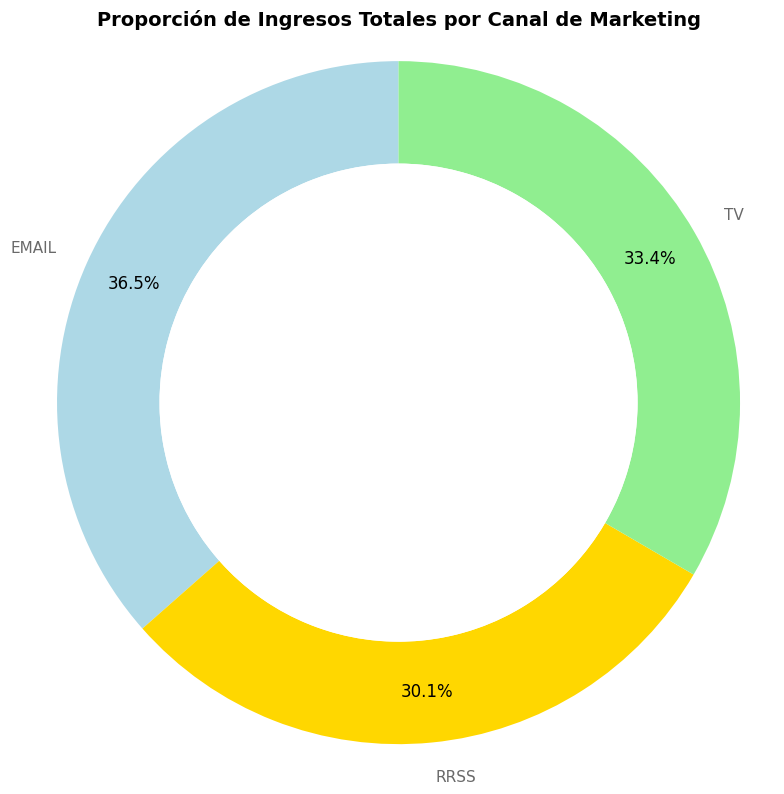

In [162]:
import matplotlib.pyplot as plt

# Prepare data for the donut chart
labels = df_income_by_channel['canal']
sizes = df_income_by_channel['porcentaje_ingreso']

# Define colors for the channels
colors = ['#ADD8E6', '#FFD700', '#90EE90'] # Light Blue for Email, Gold for RRSS, Light Green for TV

# Create the donut chart
fig, ax = plt.subplots(figsize=(8, 8))

wedges, texts, autotexts = ax.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%', # Format to show percentage on slices
    startangle=90,
    pctdistance=0.85, # Distance of percentages from the center
    colors=colors,
    wedgeprops=dict(width=0.3) # Width of the donut hole
)

# Customize percentage text
for autotext in autotexts:
    autotext.set_color('black') # Color of the percentage text
    autotext.set_fontsize(12) # Size of the percentage text

# Customize labels (channel names)
for text in texts:
    text.set_color('dimgray') # Color of the channel name text
    text.set_fontsize(11) # Size of the channel name text

# Add a central circle to create the donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

ax.set_title('Proporción de Ingresos Totales por Canal de Marketing', fontsize=14, weight='bold')
ax.axis('equal') # Ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

#### Conclusiones del Gráfico de Rosquilla: Proporción de Ingresos Totales por Canal de Marketing
Este gráfico de rosquilla visualiza la distribución porcentual de los ingresos totales generados a través de los diferentes canales de marketing (EMAIL, TV, RRSS).

**Observaciones Clave:**

- Distribución de Ingresos: Los ingresos totales se distribuyen entre los canales de marketing de la siguiente manera:

 - EMAIL: Contribuye con aproximadamente el 36.5% del ingreso total de campaña.
- TV: Aporta cerca del 33.4% del ingreso total de campaña.
- RRSS (Redes Sociales): Genera aproximadamente el 30.1% del ingreso total de campaña.

- Liderazgo de EMAIL: El canal de EMAIL, a pesar de tener una inversión de costo ligeramente menor que RRSS y TV (como se vio en el análisis de costos), es el que genera la mayor proporción de ingresos totales. Esto sugiere que EMAIL es un canal altamente efectivo en términos de retorno sobre la inversión de las campañas de marketing.

- Balance entre TV y RRSS: TV y RRSS tienen contribuciones de ingresos relativamente cercanas. TV está ligeramente por encima de RRSS en generación de ingresos, lo cual es interesante considerando que RRSS tuvo la mayor inversión en costos de campaña. Esto podría indicar que la eficiencia de RRSS en la conversión a ingresos es menor que la de TV, o que sus campañas son más costosas para el mismo nivel de ingreso.

**Estrategias:**

- Potenciar EMAIL: Dada su alta contribución a los ingresos con una inversión de costo comparativamente menor, se debería considerar aumentar la inversión y optimizar aún más las campañas de EMAIL. Es probable que este canal tenga un ROI (Retorno de la Inversión) superior.
- Evaluar Eficiencia de RRSS: Aunque RRSS tiene la mayor inversión en costos, su contribución a los ingresos es la más baja entre los tres canales. Sería crucial realizar un análisis más profundo para entender la efectividad de las campañas en RRSS, identificar si hay oportunidades de optimización para mejorar su ROI, o si la estrategia de inversión necesita ser reajustada.
- Mantener y Optimizar TV: TV mantiene una sólida contribución a los ingresos, situándose entre EMAIL y RRSS. Las estrategias para este canal deberían enfocarse en mantener su efectividad y explorar cómo podría complementarse con los otros canales para maximizar el impacto.

En resumen, este análisis visual resalta la importancia de cada canal en la generación de ingresos y proporciona una base para reevaluar las estrategias de inversión en marketing, buscando maximizar la eficiencia y el retorno.



### 📊 5. Gráfico de Correlación: Costo de Campaña e Ingreso Total de Campaña

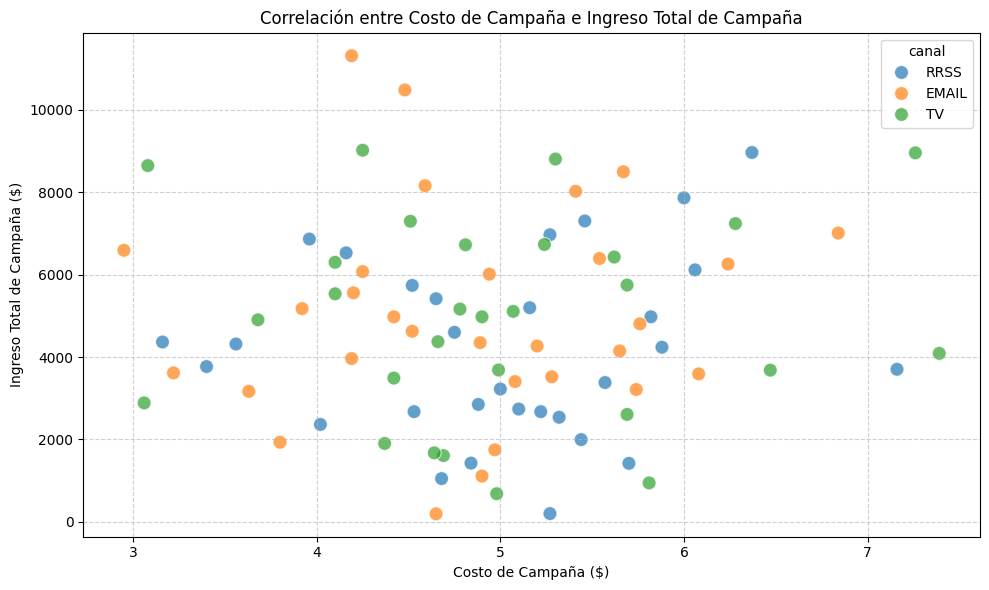


Coeficiente de correlación de Pearson entre Costo de Campaña e Ingreso Total: 0.05


In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Asegurarse de que sales_per_campaign esté disponible y contenga las columnas necesarias
# (costo e ingreso_total_campana)

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sales_per_campaign,
    x='costo',
    y='ingreso_total_campana',
    hue='canal', # Para diferenciar por canal si es relevante
    s=100, # Tamaño de los puntos
    alpha=0.7 # Transparencia
)

plt.title('Correlación entre Costo de Campaña e Ingreso Total de Campaña')
plt.xlabel('Costo de Campaña ($)')
plt.ylabel('Ingreso Total de Campaña ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Calcular el coeficiente de correlación de Pearson
correlation = sales_per_campaign['costo'].corr(sales_per_campaign['ingreso_total_campana'])
print(f"\nCoeficiente de correlación de Pearson entre Costo de Campaña e Ingreso Total: {correlation:.2f}")


#### Análisis de la Correlación entre Costo de Campaña e Ingreso Total de Campaña

Se analiza la relación entre lo que se invierte en una campaña de marketing (`costo`) y los ingresos que esa campaña genera (`ingreso_total_campana`).

**Observaciones Clave del Gráfico de Dispersión:**

*   **Tendencia General:** se observa una **tendencia positiva** general. Esto significa que a medida que el costo de la campaña aumenta, los ingresos totales generados por la campaña también tienden a aumentar.

*   **Dispersión:** Aunque hay una tendencia positiva, los puntos no forman una línea perfectamente recta, lo que indica que la correlación no es extremadamente fuerte. Hay cierta dispersión, lo que sugiere que el costo no es el *único* factor que determina los ingresos; otros elementos como la efectividad del mensaje, el producto, el momento de la campaña, etc., también juegan un papel.

*   **Distribución por Canal:** La diferenciación por canal permite ver si hay patrones distintos para `EMAIL`, `RRSS` y `TV`.
    *   A nivel general, la dinámica de que "más inversión tiende a generar más ingreso" se aplica a todos los canales.
  
**Coeficiente de Correlación de Pearson:**

*   El **coeficiente de correlación de Pearson**  hay una relación clara donde invertir más en marketing está asociado con mayores retornos de ingresos, pero con suficiente variabilidad para indicar que no es una relación perfecta y que otros factores influyen.

**Conclusión e Implicaciones Estratégicas:**

Existe una relación positiva entre el costo de las campañas y los ingresos que generan. Esto valida la inversión en marketing como un impulsor de ventas. Sin embargo, la dispersión observada también subraya la importancia de la *calidad* y *optimización* de la campaña, más allá del solo monto de la inversión.

### 📊 6. Gráfico de líneas: Tendencia de las ventas y unidades vendidas por Campaña a lo Largo del Tiempo


In [164]:
sales_per_campaign['fecha_inicio'] = pd.to_datetime(sales_per_campaign['fecha_inicio'], errors='coerce')
sales_per_campaign = sales_per_campaign.sort_values(by='fecha_inicio').reset_index(drop=True)

print("DataFrame 'sales_per_campaign' after converting 'fecha_inicio' to datetime and sorting:")
display(sales_per_campaign.head())
print("Data types after conversion:")
display(sales_per_campaign.dtypes)

DataFrame 'sales_per_campaign' after converting 'fecha_inicio' to datetime and sorting:


,id_campanha,producto,canal,costo,fecha_inicio,fecha_fin,cant_ventas,unidades_vendidas_campana,ingreso_total_campana
0,74,ADORNO DE PARED,TV,4.81,2024-03-20,2024-05-03,14,85,6724.52
1,12,TABLET,RRSS,3.40,2024-03-26,2024-05-13,9,59,3768.31
2,32,LÁMPARA DE MESA,EMAIL,5.54,2024-03-28,2024-04-20,18,93,6390.54
3,21,SMARTPHONE,RRSS,6.37,2024-03-29,2024-05-16,16,116,8965.03
4,58,ALFOMBRA,EMAIL,4.25,2024-03-31,2024-05-05,14,89,6072.51


Data types after conversion:


,0
id_campanha,int64
producto,object
canal,object
costo,float64
fecha_inicio,datetime64[ns]
fecha_fin,datetime64[ns]
cant_ventas,int64
unidades_vendidas_campana,Int64
ingreso_total_campana,Float64


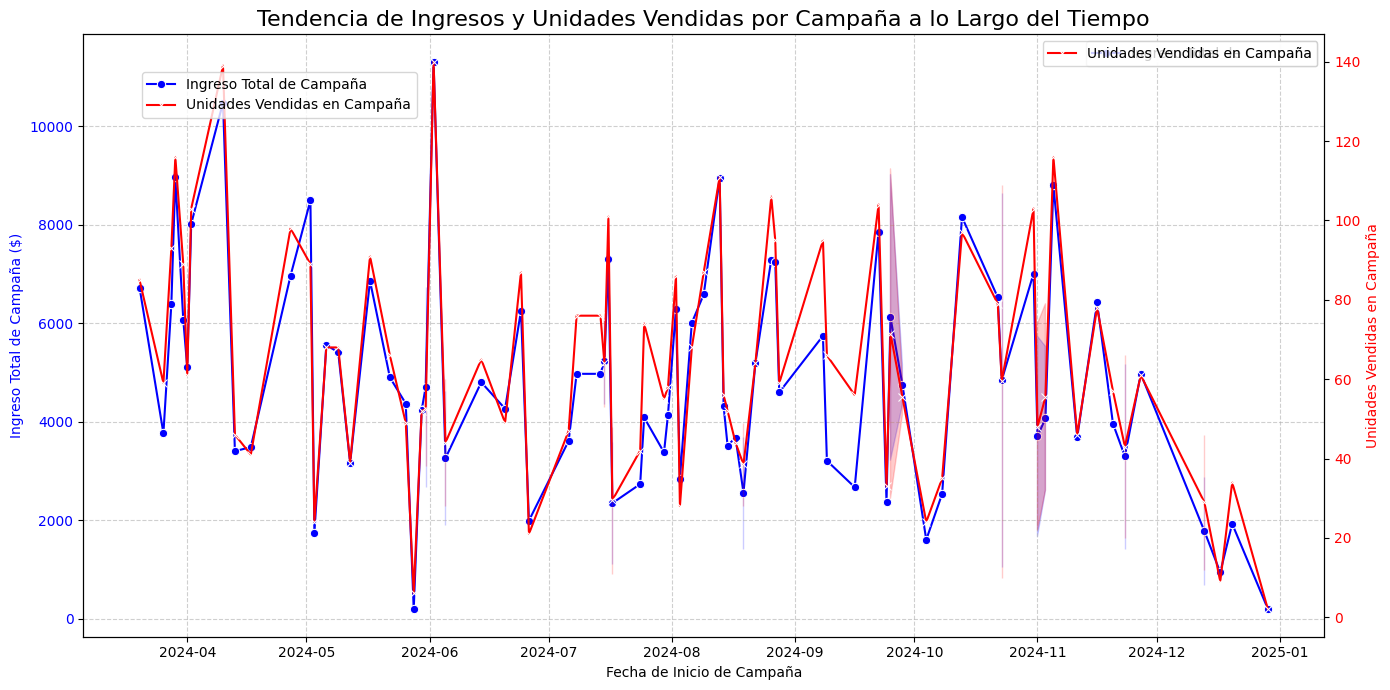

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot 'ingreso_total_campana' on the first y-axis
sns.lineplot(data=sales_per_campaign, x='fecha_inicio', y='ingreso_total_campana', ax=ax1, color='blue', marker='o', label='Ingreso Total de Campaña')
ax1.set_xlabel('Fecha de Inicio de Campaña')
ax1.set_ylabel('Ingreso Total de Campaña ($)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# Create a second y-axis to plot 'unidades_vendidas_campana'
ax2 = ax1.twinx()
sns.lineplot(data=sales_per_campaign, x='fecha_inicio', y='unidades_vendidas_campana', ax=ax2, color='red', marker='x', label='Unidades Vendidas en Campaña')
ax2.set_ylabel('Unidades Vendidas en Campaña', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and legends
plt.title('Tendencia de Ingresos y Unidades Vendidas por Campaña a lo Largo del Tiempo', fontsize=16)
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


#### Análisis de Tendencias de Ingresos y Unidades Vendidas por Campaña a lo Largo del Tiempo

El gráfico de líneas muestra la evolución del `Ingreso Total de Campaña` (línea azul) y las `Unidades Vendidas en Campaña` (línea roja) a lo largo del tiempo, utilizando la `Fecha de Inicio de Campaña` como eje X. Las principales observaciones son:

*   **Correlación Fuerte y Positiva:** Se observa una correlación muy fuerte y positiva entre el `Ingreso Total de Campaña` y las `Unidades Vendidas en Campaña`. Ambas líneas tienden a seguir patrones muy similares, subiendo y bajando en sincronía. Esto es coherente con el análisis de correlación previo y sugiere que, para estas campañas, el ingreso está directamente impulsado por el volumen de unidades vendidas.

*   **Picos y Valles Estacionales/Cíclicos:** A lo largo del año (2024), se aprecian varios picos de actividad, donde tanto los ingresos como las unidades vendidas por campaña alcanzan sus valores más altos. Por ejemplo, se notan incrementos significativos alrededor de **Mayo**, **Agosto** y **Octubre**. Estos picos podrían estar relacionados con eventos estacionales, festividades, o periodos específicos de marketing intenso (por ejemplo, Black Friday, regreso a clases, vacaciones). Asimismo, se observan valles, donde la actividad de campaña disminuye considerablemente, como a principios de **Junio**, y una caída pronunciada hacia finales de año.

*   **Consistencia de la Relación:** La cercanía y el paralelismo de las líneas azul y roja indican que, incluso durante los periodos de mayor o menor actividad, la relación entre el ingreso y las unidades vendidas se mantiene constante. Esto sugiere que el precio promedio de los productos vendidos en estas campañas no fluctúa drásticamente de una campaña a otra, o que las variaciones de precio son proporcionales al volumen de ventas.

*   **Comportamiento Final del Año:** Se observa una tendencia a la baja en ambas métricas hacia finales del año, culminando en los valores más bajos al inicio de 2025. Esto podría ser un patrón estacional esperado (menor actividad post-navideña, por ejemplo) o una señal de que las últimas campañas del año no fueron tan efectivas como las anteriores.

**Conclusión e Insights:**

Esta visualización es crucial para entender la dinámica temporal del rendimiento de las campañas. Confirma que el volumen de ventas es el motor principal del ingreso en las campañas y permite identificar periodos de alta y baja actividad. Los **picos** de actividad son oportunidades para capitalizar la demanda, mientras que los **valles** podrían requerir una reevaluación de las estrategias o la introducción de ofertas especiales para estimular las ventas. El patrón observado a finales de año merece una investigación más profunda para determinar si es un patrón recurrente o un indicio de un cambio en la efectividad de las campañas.

### 📊 7. Boxplot interactivo por categoría

In [166]:
import plotly.express as px
import pandas as pd

# Asegurarse de que ventas_perf esté disponible y contenga las columnas 'categoria' e 'ingreso'

fig = px.box(
    ventas_perf,
    x='categoria',
    y='ingreso',
    title='Ventas por Categoría (Interactive Boxplot)',
    labels={
        'categoria': 'Categoría',
        'ingreso': 'Ventas por Categoría ($)'
    },
    points='all' # Muestra todos los puntos individuales, incluyendo los outliers
)

fig.update_layout(
    xaxis_title_text='Categoría',
    yaxis_title_text='Ventas por Categoría ($)'
)

fig.show()


#### Conclusiones del Boxplot Interactivo de Ventas por Categoría (usando Plotly)

Aunque las ventas individuales en las tres categorías muestran una tendencia central y una dispersión bastante uniformes, la existencia de outliers significativos revela un componente de ventas de alto valor que es crucial para el análisis de rentabilidad. Para maximizar los ingresos, es importante no solo optimizar las ventas promedio, sino también entender y potenciar los factores que impulsan estas transacciones de alto ingreso en todas las categorías.

# Presentación del Proyecto Final: Hallazgos Clave y Recomendaciones Estratégicas
 Esta presentación resume el análisis integral de los datos de ventas y marketing, proporcionando información sobre el rendimiento de los productos, las contribuciones por categoría y la efectividad del marketing.

---

### 1. Productos Líderes y Categorías Sobresalientes

**Productos Líderes:**
Basado en el ingreso total y métricas de rendimiento, los productos de mejor rendimiento, a menudo identificados como **"productos estrella"**, son:
*   **LÁMPARA DE MESA** (approx. \$82,276.38)
*   **AURICULARES** (approx. \$74,175.58)
*   **MICROONDAS** (approx. \$72,562.89)
*   **CAFETERA** (approx. \$59,607.31)
*   **CUADRO DECORATIVO** (approx. \$54,297.60)
*   **SMARTPHONE** (approx. \$54,132.44)

Estos productos muestran consistentemente altos ingresos y ventas unitarias, contribuyendo significativamente al ingreso total, como se destaca en el gráfico de Pareto donde los 12 productos principales representan más del 80% del ingreso total.

**Categorías Sobresalientes:**
El análisis de los ingresos por categoría revela una contribución relativamente equilibrada, pero con un claro líder:
*   **ELECTRODOMÉSTICOS:** Contribuye aproximadamente con un 34.4% del ingreso total, convirtiéndola en la categoría más significativa en términos de ingresos.
*   **ELECTRÓNICA:** Sigue de cerca con aproximadamente un 32.9% del ingreso total.
*   **DECORACIÓN:** Representa aproximadamente un 32.7% del ingreso total.

Si bien Electrodomésticos lidera, las tres categorías contribuyen sustancialmente a los ingresos del negocio.

---

### 2. Diferencia entre Media y Mediana y su Interpretación

**Ingresos Totales por Producto:**
*   **Media:** \$48,934.61
*   **Mediana:** \$48,240.77
*   **Interpretación:** La media es ligeramente superior a la mediana, indicando una **ligera asimetría positiva** (o sesgo a la derecha) en la distribución de los ingresos de los productos. Esto sugiere que algunos productos con ingresos significativamente más altos están aumentando la media, mientras que la mayoría de los productos se sitúa más cerca de la mediana o por debajo de ella. Esto apunta a la existencia de **"productos estrella"** que se desempeñan excepcionalmente bien, junto a una base más amplia de artículos de rendimiento moderado.

**Ingresos Totales por Categoría:**
*   **Media:** \$489,346.09
*   **Mediana:** \$483,092.88
*   **Interpretación:** Al igual que los productos, la media para las categorías también está ligeramente por encima de la mediana, lo que implica una **ligera asimetría positiva**. Sin embargo, la diferencia es más pequeña, reforzando la idea de que mientras Electrodomésticos lidera, las categorías están más equilibradas en su contribución total de ingresos en comparación con los productos individuales.

---

### 3. Presencia e impacto de Outliers

**Nivel de Producto (Ingreso Total por Producto)**
*   **Valores Atípicos Superiores (Alto Rendimiento):** 'LÁMPARA DE MESA', 'AURICULARES', 'MICROONDAS', 'CAFETERA', 'CUADRO DECORATIVO', 'SMARTPHONE'. Estos son productos que generan ingresos significativamente por encima del rango típico, confirmándolos como impulsores clave de ingresos. Su impacto es altamente positivo, contribuyendo al ingreso total.
*   **Valores Atípicos Inferiores (Bajo Rendimiento):** 'TABLET', 'HELADERA', 'CANDELABRO'. Estos productos tienen ingresos inusualmente bajos en comparación con la mayoría. Su impacto es negativo en la rentabilidad general y pueden requerir una revisión estratégica.

**Nivel de Categoría (Ingreso Total por Categoría):**
*   **No Se Detectaron Valores Atípicos**: El análisis del boxplot y el IQR para el ingreso total por categoría no revelaron valores atípicos significativos. Esto indica una distribución homogénea y bien equilibrada de los ingresos a través de las categorías, sugiriendo un rendimiento consistente sin extremos altos o bajos de ninguna categoría individual.

**Nivel de Campaña (Ingreso Total por Campaña, Unidades Vendidas por Campaña, Cantidad de Ventas):**
*   **No Se Detectaron Valores Atípicos:** A través de las métricas clave de la campaña (ingreso, unidades, conteo de ventas), no se identificaron valores atípicos significativos. Esto implica una consistencia y estabilidad general en el rendimiento de las campañas, sin campañas que superen drásticamente o se desempeñen por debajo del resto..

**Impacto de Outliers:**
La presencia de valores atípicos a nivel de producto significa una clara diferenciación en el rendimiento, requiriendo estrategias personalizadas para los de alto rendimiento (maximización) y los de bajo rendimiento (re-evaluación). La ausencia de valores atípicos en niveles agregados superiores (categorías, campañas) sugiere estabilidad general, pero también destaca la necesidad de analizar datos más granulares de productos para identificar variaciones críticas en el rendimiento.

---

### 4. Recomendaciones sobre Productos a Mejorar y Estrategias de Eficiencia de Marketing

**Productos a Mejorar:**
*   **Enfocarse en los Principales Generadores de Ingresos:** Productos como **LÁMPARA DE MESA, AURICULARES, MICROONDAS, CAFETERA, CUADRO DECORATIVO, y SMARTPHONE** son los principales generadores de ingresos. Las estrategias deben priorizar:
    *   Asegurar la disponibilidad continua de stock.
    *    Crear campañas de marketing específicas para mantener o aumentar su cuota de mercado.
    *   Explorar oportunidades para versiones premium o productos complementarios:.
*   **Re-evaluar Productos de Bajo Rendimiento:** Productos como **CANDELABRO, TABLET, y HELADERA** están teniendo un rendimiento significativamente bajo. Se recomienda:
    *   Analizar las razones de bajas ventas (precio, demanda del mercado, características del producto).
    *   Considerar campañas promocionales específicas o, si no son viables, retirar estos productos para optimizar recursos.
*   **Aprovechar Categorías Fuertes:** La categoría **Electrodomésticos**  es la más rentable y debe recibir prioridad en términos de desarrollo de nuevos productos, inventario y asignación de presupuesto promocional.

** Estrategias de Eficiencia de Marketing:**

*   **Optimizar la Inversión en Canales:**
    *   **EMAIL:** A pesar de una inversión de costo potencialmente más baja (como se vio en el análisis anterior), las campañas de EMAIL contribuyen con la mayor proporción del ingreso total de la campaña (36.5%). Esto sugiere un alto ROI. **Recomendación: Aumentar la inversión y seguir optimizando los esfuerzos de marketing por EMAIL.**
    *   **TV:** Contribuye significativamente (33.4%) y es un canal sólido. **Recomendación: Mantener efectividad y explorar estrategias complementarias con otros canales.**
    *   **RRSS (Redes Sociales):** Tiene la menor contribución de ingresos (30.1%) a pesar de una mayor inversión en costos. **Recomendación: Realizar un análisis más profundo sobre la efectividad de las campañas en RRSS, identificar oportunidades de optimización (por ejemplo, audiencia objetivo, creativos publicitarios, plataformas), o redistribuir el presupuesto a canales más eficientes.**
*   **Priorizar la Calidad de la Campaña:** Una débil correlación positiva (coeficiente de Pearson de ~0.05) entre el costo de la campaña y el ingreso total sugiere que simplemente gastar más no garantiza un aumento proporcional en los ingresos. **Recomendación: Enfocarse en la calidad y optimización del contenido de la campaña, la segmentación y el tiempo, en lugar de solo en la cantidad del presupuesto.** Un mensaje efectivo y una ejecución estratégica son cruciales.
*   **Aprovechar las Tendencias Estacionales:** El análisis temporal de las campañas mostró picos claros (por ejemplo, mayo, agosto, octubre) y valles en ventas e ingresos. **Recomendación: Alinear los esfuerzos de marketing con estos períodos de alta actividad, intensificando las campañas durante los picos y posiblemente lanzando ofertas especiales durante los valles para estimular la demanda.** Comprender estos patrones puede maximizar el impacto del gasto en marketing.

---

**Conclusión General:**
 Se obtuvo una comprensión integral del rendimiento comercial del negocio, destacando que un pequeño número de productos impulsa significativamente los ingresos, mientras que las categorías contribuyen de manera más uniforme. Los esfuerzos de marketing deben alinearse estratégicamente con el rendimiento del producto y la eficiencia del canal, con un fuerte énfasis en optimizar las campañas para un impacto máximo en lugar de solo en el gasto.